# Assignment Puah Yi Hao
<a class="anchor" id="0.0"></a>

# Overview

Dear viewers, welcome to Yi Hao's CZ1016 Exploratory Data Analysis assignment. Today, in this Jupyter Notebook we will be diving into two datasets: `performance_math.csv` and `performance_lang.csv`. Things we will explore include: 

* Importing, cleaning the dataset

* Performing initial EDA

* Extending our EDA in the direction of the 5 Questions

* Machine Learning to address problems (Linear Regression/DecisionTree Classification)

Packages we will need in this notebook include:
* Pandas
* Numpy
* Seaborn
* Warnings
* [Graphviz (Visualising)](https://pypi.org/project/graphviz/)
* [Imblearn (SMOTE)](https://pypi.org/project/imbalanced-learn/)

I have provided a table of content page for ease of accessibility.

### Content Page
<a class="anchor" id="0.1"></a>

###### Introduction
   * 1.1 [Importing Relevant Packages](#1.1)
   * 1.2 [Dataset Cleaning and Merging](#1.2)
<a class="anchor" id="0.2"></a>

###### Initial EDA
   * 2.1 [Exploratory Data Analysis](#2.1)
   * 2.2 [Language and Math Term Grades](#2.2)
   * 2.3 [Student Details](#2.3)
   * 2.4 [Effect of Residence](#2.4)
<a class="anchor" id="0.3"></a>

###### Question 1  
   * 3.1 [Parents Education/Job](#3.1)
   * 3.2 [Family Relationship](#3.2)
   * 3.3 [Family Support](#3.3)
   * 3.4 [Q1 Conclusion](#3.4)
<a class="anchor" id="0.4"></a>

###### Question 2
   * 4.1 [Categorical attributes of Students](#4.1)
   * 4.2 [Numeric attributes of Students](#4.2)
   * 4.3 [Q2 Conclusion](#4.3)
<a class="anchor" id="0.5"></a>

###### Question 3
   * 5.1 [School Support](#5.1)
   * 5.2 [Q3 Conclusion](#5.2)
<a class="anchor" id="0.6"></a>

###### Question 4
   * 6.1 [Term Grades between Schools](#6.1)
   * 6.2 [Q4 Conclusion](#6.2)
<a class="anchor" id="0.7"></a>

###### Question 5
   * 7.1 [Looking at trends in grades](#7.1)
   * 7.2 [Q5 Conclusion](#7.2)

###### Machine Learning
   * 8.1 [Predict T4 grades (Linear Regression)](#8.1)
   * 8.2 [Should school support be given (Decision Tree)](#8.2)

<a class="anchor" id="1.1"></a>
##### 1.1 Importing Relevant Packages
Our first few lines of code involves importing the necessary packages and files

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

pd.options.display.max_columns = None
sb.set()
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


We will now read our dataset using the `pd.read_csv()` method and store the datasets in `pf_lang` and `pf_math` respectively.

In [150]:
# Reading the relevant files
pf_lang = pd.read_csv('performance_lang.csv')
pf_math = pd.read_csv('performance_math.csv')

# Renaming Term Grades
pf_math = pf_math.rename(columns= {'T1':'Term 1 Math','T2':'Term 2 Math','T3':'Term 3 Math'})

print("First Dataset of size: {}\n".format(pf_lang.shape[0]))
display(pf_lang.head())

print("Second Dataset of size: {}\n".format(pf_math.shape[0]))
display(pf_math.head())




First Dataset of size: 649



,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,PastFails,SchoolSup,FamilySup,PaidSup,Activities,Internet,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,T1,T2,T3
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,0,Yes,No,No,No,No,No,4,3,4,3,4,0,11,11
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,0,No,Yes,No,No,Yes,No,5,3,3,3,2,9,11,11
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,0,Yes,No,No,No,Yes,No,4,3,2,3,6,12,13,12
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,0,No,Yes,No,Yes,Yes,Yes,3,2,2,5,0,14,14,14
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,0,No,Yes,No,No,No,No,4,3,2,5,0,11,13,13


Second Dataset of size: 395



,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,PastFails,SchoolSup,FamilySup,PaidSup,Activities,Internet,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,Term 1 Math,Term 2 Math,Term 3 Math
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,0,Yes,No,No,No,No,No,4,3,4,3,6,5,6,6
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,0,No,Yes,No,No,Yes,No,5,3,3,3,4,5,5,6
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,3,Yes,No,Yes,No,Yes,No,4,3,2,3,10,7,8,10
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,0,No,Yes,Yes,Yes,Yes,Yes,3,2,2,5,2,15,14,15
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,0,No,Yes,Yes,No,No,No,4,3,2,5,4,6,10,10


As you can see there are 2 datasets for Math and Language students. In order to ensure the scores do not overlap when merging, we have renamed the columns `T1`, `T2`, `T3`.

<a class="anchor" id="1.2"></a>
##### 1.2 Data cleaning and merging
<b>Disclaimer</b>: We have created one dataset that involves merging both datasets (Required to mention)

We will try to clean up the dataset by merging the datasets for math and language together while ensuring same students in both dataset do not duplicate

In [95]:
# Concatenating both datasets into one (finding out repeated students) and finding out general information about the dataset
merge_on = list(pf_lang.columns)[0:-3]
df = pd.merge(pf_lang, pf_math, how='left',left_on=merge_on, right_on =merge_on)
merge_on = list(pf_lang.columns)[0:-3]

df2 = pd.merge(pf_lang, pf_math, how='right',left_on=merge_on, right_on =merge_on)
df2 = df2.loc[df2['T1'].isnull()]
df = pd.concat([df,df2])

print("New DataFrame after merging has length:",len(df))
df.info()
df.head(5)

New DataFrame after merging has length: 1005
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 394
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   School       1005 non-null   object 
 1   Gender       1005 non-null   object 
 2   Age          1005 non-null   int64  
 3   Residence    1005 non-null   object 
 4   MomEdu       1005 non-null   int64  
 5   DadEdu       1005 non-null   int64  
 6   MomJob       1005 non-null   object 
 7   DadJob       1005 non-null   object 
 8   TravelTime   1005 non-null   int64  
 9   StudyTime    1005 non-null   int64  
 10  PastFails    1005 non-null   int64  
 11  SchoolSup    1005 non-null   object 
 12  FamilySup    1005 non-null   object 
 13  PaidSup      1005 non-null   object 
 14  Activities   1005 non-null   object 
 15  Internet     1005 non-null   object 
 16  Romantic     1005 non-null   object 
 17  FamilyRel    1005 non-null   int64  
 18  Free

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,PastFails,SchoolSup,FamilySup,PaidSup,Activities,Internet,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,T1,T2,T3,Term 1 Math,Term 2 Math,Term 3 Math
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,0,Yes,No,No,No,No,No,4,3,4,3,4,0.0,11.0,11.0,NaN,NaN,NaN
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,0,No,Yes,No,No,Yes,No,5,3,3,3,2,9.0,11.0,11.0,NaN,NaN,NaN
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,0,Yes,No,No,No,Yes,No,4,3,2,3,6,12.0,13.0,12.0,NaN,NaN,NaN
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,0,No,Yes,No,Yes,Yes,Yes,3,2,2,5,0,14.0,14.0,14.0,NaN,NaN,NaN
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,0,No,Yes,No,No,No,No,4,3,2,5,0,11.0,13.0,13.0,NaN,NaN,NaN


`merge_on`: represents the columns we are using to merge the dataset. This is because duplicated students share the same features except their Math and Language grades

<b>Excluding</b> our grades columns, our dataset has 0 missing/NaN values. Let us perform some data cleaning of the column names that might not be clear so they are easier to read and interpret

* MomEdu/DadEdu : Mother/Father Education
* PastFails: Class Fails
* PaidSup: Tution
* Activities: CCA
* Absences: School Absenty

In [96]:
df = df.rename(columns={'MomEdu':'Mother Education','DadEdu':'Father Education',
                   'MomJob':'Mother Job','DadJob':'Father Job', 'PastFails':'Class Fails',
                   'SchoolSup':'School Support','FamilySup':'Family Support',
                   'PaidSup':'Tution','Activities':'CCA','FamilyRel':'Family Relationship',
                  'Absences':'School Absenty','T1':'Term 1 Lang','T2':'Term 2 Lang','T3':'Term 3 Lang'})
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
# We will fill nan values with -1 as -1 is not in our grading system and we can ignore it
#df = df.fillna(-1)

`df`: Our dataset that has the combined values of both datasets and renamed columns for ease of reading. 

##### Justifying why i did not fill NaN values
It is <b>important</b> to note that i have decided to leave the NaN values in grades that way instead of fillna as NaN grades do not affect the plots compared to if i were to fill them with etc 0. I have considered filling with the mean but i did not want to affect my median score or vice versa.

Let us create a column with the average grade across all Terms

In [97]:
df['Term Lang Avg'] = (df['Term 1 Lang'] + df['Term 2 Lang'] + df['Term 3 Lang'])/3
df['Term Math Avg'] = (df['Term 1 Math'] + df['Term 2 Math'] + df['Term 3 Math'])/3


`Term ___ Avg`: The average grade across all three terms. Important to note that this is not in `np.int64` format but `np.float64`

In [98]:
# Splitting the dataset by those who have done language and math and both
df_lang = df[df['Term 1 Lang'].notnull()]
df_math = df[df['Term 1 Math'].notnull()]
df_langmath = df.loc[df['Term 1 Lang'] >= 0]
df_langmath = df_langmath.loc[df_langmath['Term 1 Math'] >= 0]
df_lang.reset_index(inplace=True)
df_lang.drop(columns=['index'],inplace=True)
df_math.reset_index(inplace=True)
df_math.drop(columns=['index'],inplace=True)
df_langmath.reset_index(inplace=True)
df_langmath.drop(columns=['index'],inplace=True)

print("Students who take language test", len(df_lang))
print("Students who take math test", len(df_math))
print("Students who take language and math test", len(df_langmath))

Students who take language test 649
Students who take math test 395
Students who take language and math test 39


C:\Users\yihao\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


`df_lang`: Dataset with students taking only Language

`df_math`: Dataset with students taking only Math

`df_langmath`: Dataset with students who took both Math and Language

With these 3 cleaned datasets, let us try to do some Exploratory Data Analysis

###### [Return to Table of Contents](#0.1)

<a class="anchor" id="2.1"></a>
# Exploratory Data Analysis

Having cleaned up our datasets, we will now perform some simple EDA to describe and visualize the dataset
<a class="anchor" id="special1"></a>


In [99]:
# We will do a quick description of the Term results
df[['Term 1 Lang','Term 2 Lang','Term 3 Lang', 'Term 1 Math','Term 2 Math','Term 3 Math']].describe()

,Term 1 Lang,Term 2 Lang,Term 3 Lang,Term 1 Math,Term 2 Math,Term 3 Math
count,649.000000,649.000000,649.000000,395.000000,395.000000,395.000000
mean,11.399076,11.570108,11.906009,10.908861,10.713924,10.415190
std,2.745265,2.913639,3.230656,3.319195,3.761505,4.581443
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,8.000000,9.000000,8.000000
50%,11.000000,11.000000,12.000000,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000,19.000000,19.000000,20.000000


### Gender Distribution
The first thing we will do is to try and find out whether the school's gender distribution is quite even. 

Let us visualize this using the `sb.catplot()` method:


Text(0.45, 1, 'Gender Distribution across Schools')

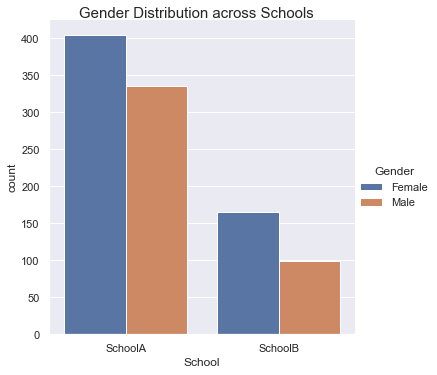

In [100]:
f = sb.catplot(data=df, x='School', kind='count', hue='Gender')
f.fig.suptitle('Gender Distribution across Schools', y = 1, x=0.45, fontsize=15)

<a class="anchor" id="2.2"></a>
### Visualizing the Term Grades
Such a huge amount of information, let us visualize this in plots instead! By closer observation on the text description, the only numeric variables that are actually somewhat of numeric comparison are the Term grades.

We will use three plots: `sb.boxplot`, `sb.histplot`, `sb.violinplot`

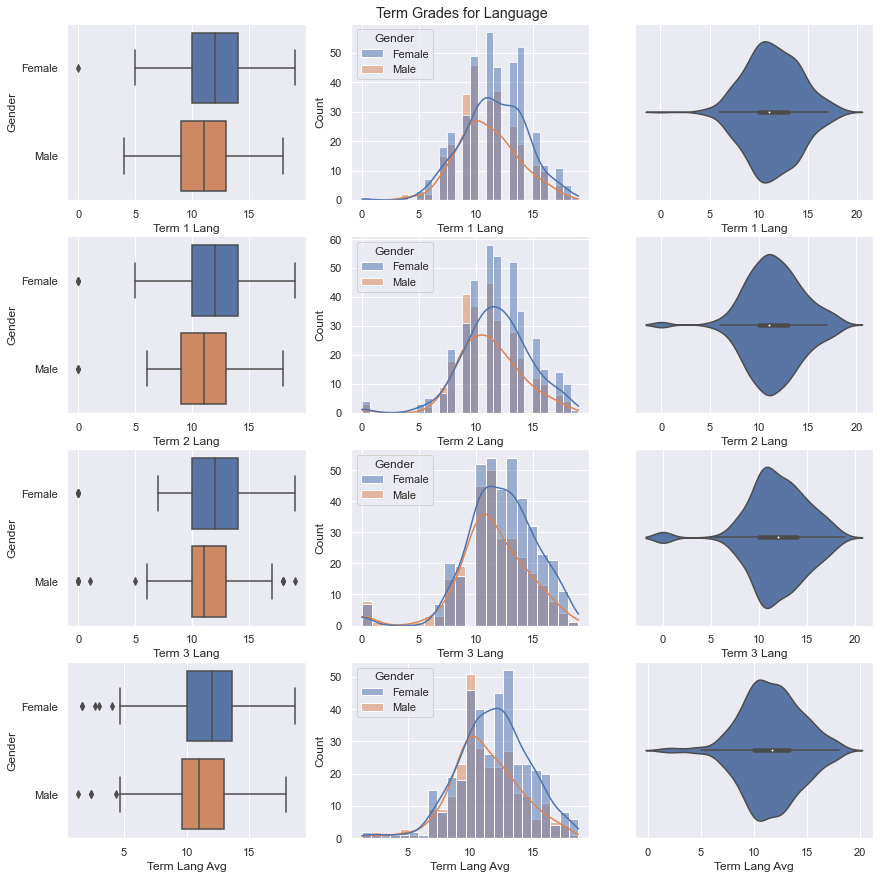

In [101]:
# Let us first look at the Term Grades for Language
family_features = ['Term 1 Lang', 'Term 2 Lang', 'Term 3 Lang','Term Lang Avg']
f,axes = plt.subplots(len(family_features), 3, figsize=(12,12))
f.tight_layout()
f.suptitle("Term Grades for Language", y = 1)
count = 0
for i in family_features:
    sb.boxplot(data = df_lang,x=i,y='Gender', ax=axes[count,0])
    sb.histplot(data=df_lang,x=i,kde=True, hue='Gender',ax=axes[count,1])
    sb.violinplot(data=df_lang,x=i, ax=axes[count,2])
    count+=1

We can immediately see from the histplot that the Term Grades generally seem to follow a 'somewhat' <b>normal distribution</b>. Furthermore, it doesn't seem like there is too much of a difference in grades between gender except females doing slightly better

Let us see if this is the same with Math

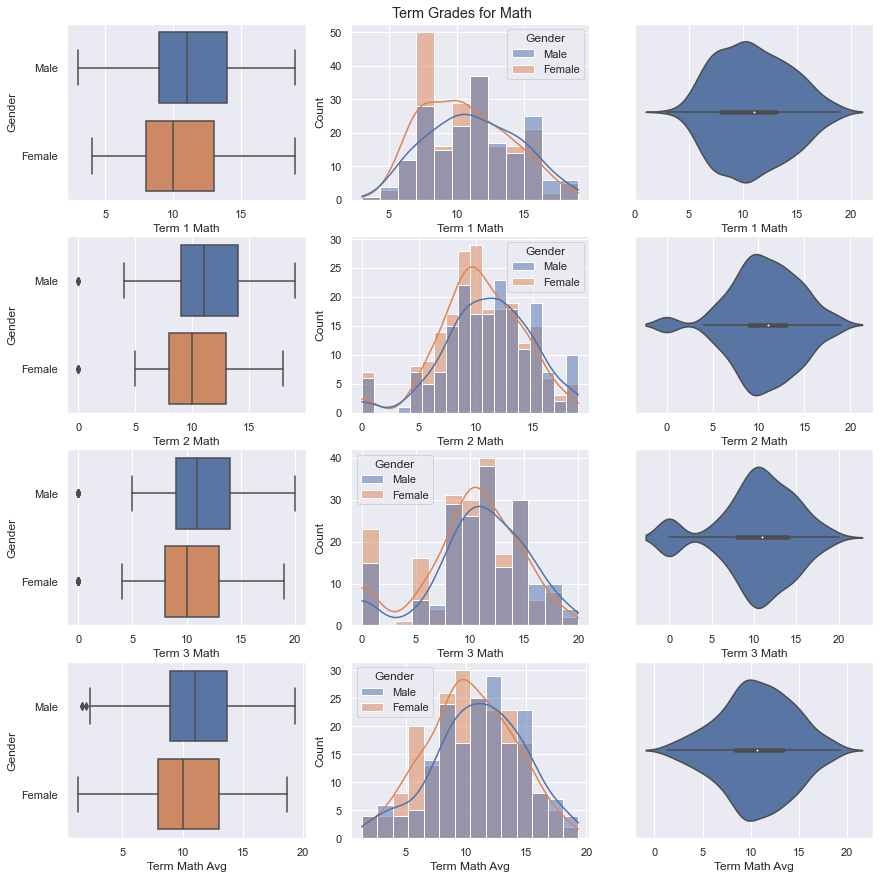

In [102]:
# Let us first look at the Term Grades for Maths
family_features = ['Term 1 Math', 'Term 2 Math', 'Term 3 Math','Term Math Avg']
f,axes = plt.subplots(len(family_features), 3, figsize=(12,12))
f.tight_layout()
f.suptitle("Term Grades for Math", y = 1)
count = 0
for i in family_features:
    sb.boxplot(data = df_math,x=i,y='Gender', ax=axes[count,0])
    sb.histplot(data = df_math, x = i,hue='Gender',kde=True, ax=axes[count,1])
    sb.violinplot(data=df_math,x=i, ax=axes[count,2])
    count+=1

The math results seem to be similar to that of language results with one notable exception being the Term 1 Math grade seems to be unevenly distributed. If we look closely, we notice that there are 2 peaks in the grades which implies most students either did badly or ok. Additionally it seems that guys performed slightly better than girls in general

Overall: The Term grades of students all generally seem to follow a normal distribution. My personal guess is because most schools adopt a bell-curve system. The notable distinction would be <b>guys being clearly better at Math and girls being clearly better at language</b>


### Assigning alphabetical grades based on score
Let us try to assign an actual grade to students just to get a rough idea of their performance. We will use 

* A: 16-20
* B: 14-15
* C: 10-13
* E: 8-9
* D: 6-7
* F: 0-5

In [103]:
alphabet_math = []
alphabet_language = []

for i in range(df.shape[0]):
    if df['Term Math Avg'][i] >= 16:
        alphabet_math.append('A')
    elif 14 <= df['Term Math Avg'][i] < 16:
        alphabet_math.append('B')
    elif 10 <= df['Term Math Avg'][i] <14:
        alphabet_math.append('C')
    elif 8 <= df['Term Math Avg'][i] < 10:
        alphabet_math.append("D")
    elif 6 <= df['Term Math Avg'][i] < 8:
        alphabet_math.append("E")
    elif 0 <= df['Term Math Avg'][i] < 6:
        alphabet_math.append("F")
        
    if df['Term Lang Avg'][i] >= 16:
        alphabet_language.append('A')
    elif 14 <= df['Term Lang Avg'][i] < 16:
        alphabet_language.append('B')
    elif 10 <= df['Term Lang Avg'][i] <14:
        alphabet_language.append('C')
    elif 8 <= df['Term Lang Avg'][i] < 10:
        alphabet_language.append("D")
    elif 6 <= df['Term Lang Avg'][i] < 8:
        alphabet_language.append("E")
    elif 0 <= df['Term Lang Avg'][i] < 6:
        alphabet_language.append("F")


Text(0.5, 1.0, 'Language alphabetic grades')

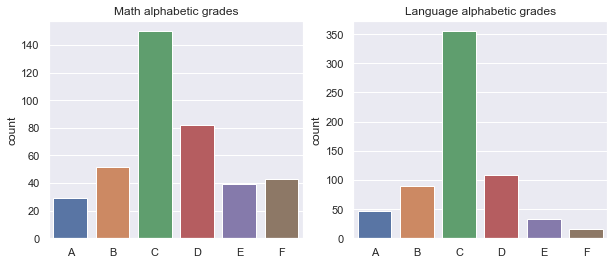

In [104]:
f,axes = plt.subplots(1,2,figsize=(10,4))
sb.countplot(sorted(alphabet_math), ax=axes[0]).set_title('Math alphabetic grades')
sb.countplot(sorted(alphabet_language),ax=axes[1]).set_title('Language alphabetic grades',)

We can clearly see that a large amount of students scored C in both language. There was a higher proportion of failures for Mathematics

### Recapping...
So far have taken a look at 
* Gender distribution and impact on grades
* Alphabetical range of grades

We will next examine the students who studied <b>both</b> Math and Language to try to see if there is any form of relation or distinction

### Students who did both Math and Language
How about students who studied both things, did they perform much better in one subject over another?

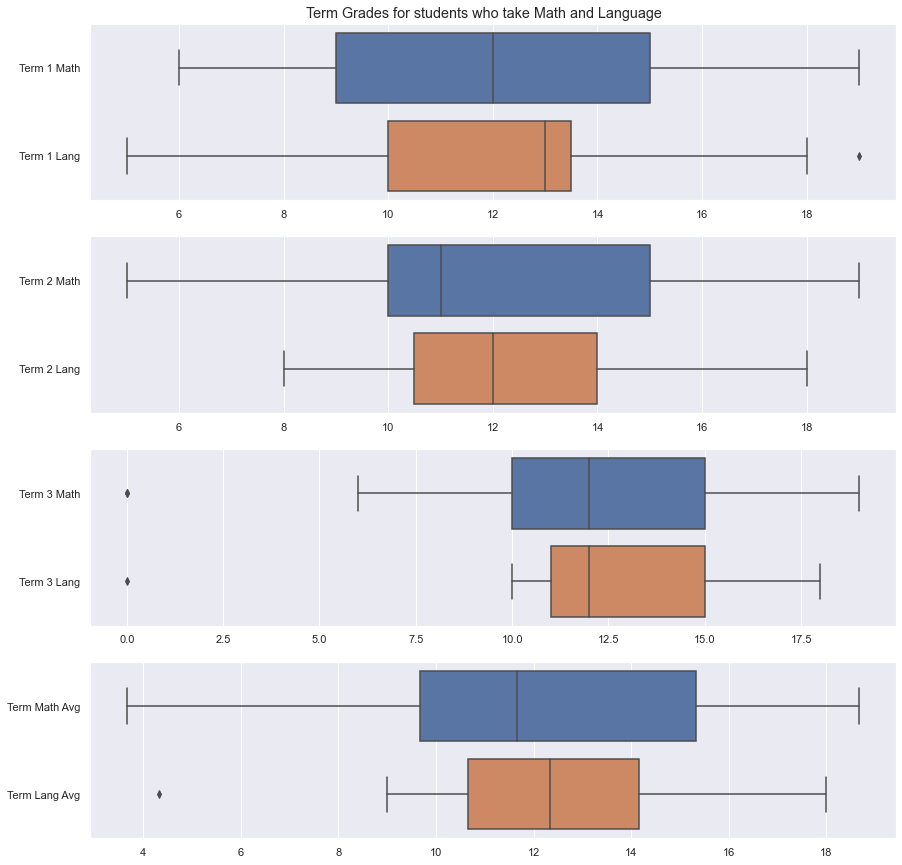

In [105]:
# Let us first look at the Term Grades for students who take both language and math
family_features = [['Term 1 Math','Term 1 Lang'], ['Term 2 Math','Term 2 Lang'], ['Term 3 Math','Term 3 Lang'],['Term Math Avg','Term Lang Avg']]
f,axes = plt.subplots(4, 1, figsize=(12,12))
f.tight_layout()
f.suptitle("Term Grades for students who take Math and Language", y = 1)
count = 0
for i in family_features:
    sb.boxplot(data = df_langmath[i], ax=axes[count], orient='h')
    count+=1

What this tells us is that the students results differed between terms and subjects

Can we see if there is a relation between their math grades and language grades?

In [106]:
alphabet_math = []
alphabet_language = []

for i in range(df_langmath.shape[0]):
    if df_langmath['Term Math Avg'][i] >= 16:
        alphabet_math.append('A')
    elif 14 <= df_langmath['Term Math Avg'][i] < 16:
        alphabet_math.append('B')
    elif 10 <= df_langmath['Term Math Avg'][i] <14:
        alphabet_math.append('C')
    elif 8 <= df_langmath['Term Math Avg'][i] < 10:
        alphabet_math.append("D")
    elif 6 <= df_langmath['Term Math Avg'][i] < 8:
        alphabet_math.append("E")
    elif 0 <= df_langmath['Term Math Avg'][i] < 6:
        alphabet_math.append("F")
        
    if df_langmath['Term Lang Avg'][i] >= 16:
        alphabet_language.append('A')
    elif 14 <= df_langmath['Term Lang Avg'][i] < 16:
        alphabet_language.append('B')
    elif 10 <= df_langmath['Term Lang Avg'][i] <14:
        alphabet_language.append('C')
    elif 8 <= df_langmath['Term Lang Avg'][i] < 10:
        alphabet_language.append("D")
    elif 6 <= df_langmath['Term Lang Avg'][i] < 8:
        alphabet_language.append("E")
    elif 0 <= df_langmath['Term Lang Avg'][i] < 6:
        alphabet_language.append("F")
df_langmath['Math Alphabetical Grade'] = alphabet_math
df_langmath['Language Alphabetical Grade'] = alphabet_language

<AxesSubplot:xlabel='Language Alphabetical Grade', ylabel='Math Alphabetical Grade'>

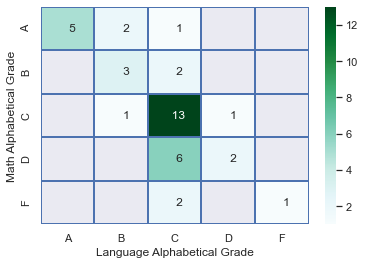

In [107]:
sb.heatmap(df_langmath.groupby(['Math Alphabetical Grade','Language Alphabetical Grade']).size().unstack(), annot=True, cmap ="BuGn", fmt='4.0f',linewidths=1,linecolor='b')

We can see for students who did both subjects, there was some form of linear relationship whereby the better they did in language implied the better they did for math compared to others

### Relation between Terms

Now that we have seen the relationship between both subjects, we should now try to look at the relation <b>within</b> the subjects term grades. Let us try to visualize this.

We will use the `sb.heatmap()` method:

<AxesSubplot:xlabel='Term 2 Lang', ylabel='Term 1 Lang'>

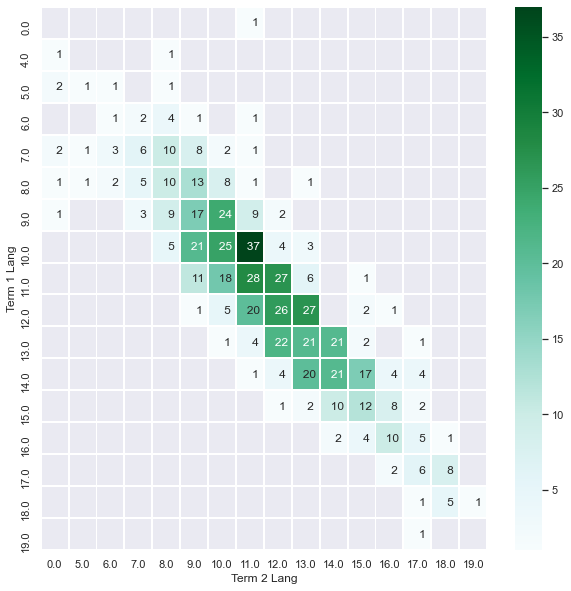

In [108]:
# Let us just try to plot a graph to observe if the Term 1 Language grades have a relation with that of Term 2 Language
plt.figure(figsize=(10,10))
sb.heatmap(df[df['Term 1 Lang'] >= 0].groupby(['Term 1 Lang', 'Term 2 Lang']).size().unstack(), annot = True, cmap = "BuGn", linewidths = 1, fmt='4.0f')

There seems to be some form of relationship which is good.
We should try to visualize this using a pairplot instead with the `sb.pairplot()` method:

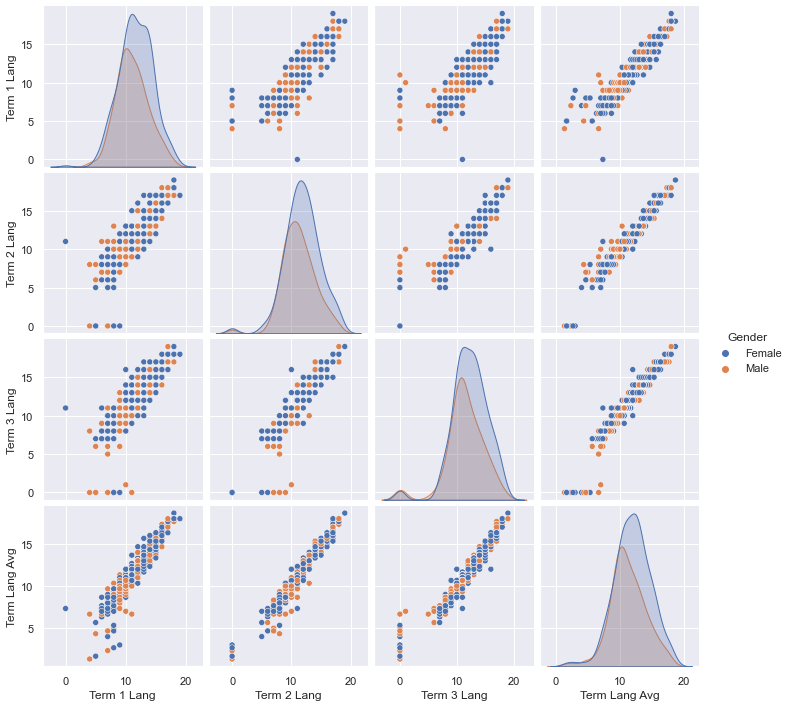

In [109]:
# Let us try to see if there is a relationship between grades of different terms for language
data = df_lang[['Term 1 Lang', 'Term 2 Lang', 'Term 3 Lang','Term Lang Avg','Gender']]
sb.pairplot(data=data, hue='Gender')

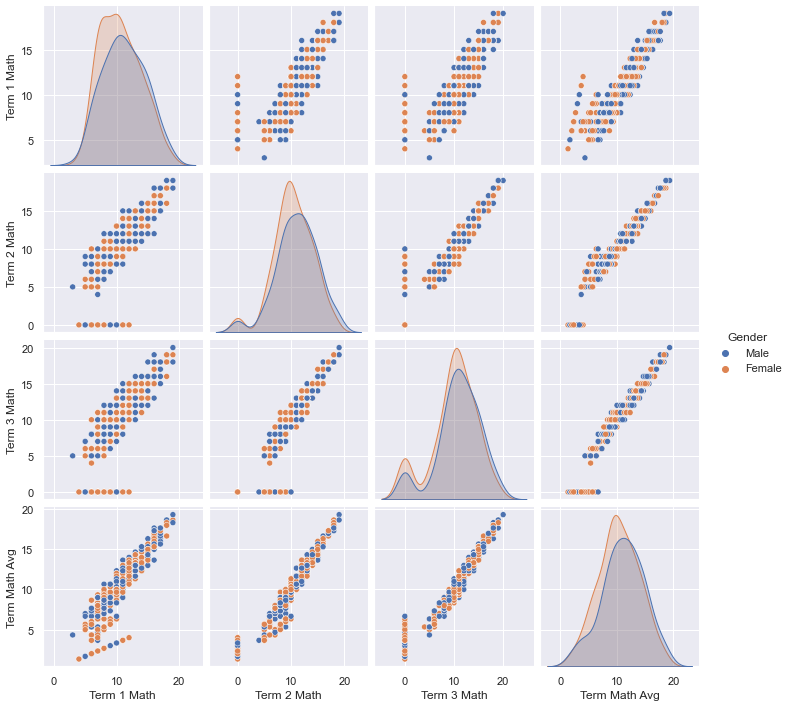

In [110]:
# Let us try to see if there is a relationship between grades of different terms for Math
data = df_math[['Term 1 Math', 'Term 2 Math', 'Term 3 Math','Term Math Avg','Gender']]
sb.pairplot(data=data, hue='Gender')

There seems to be a linear relationship between the grades with a few exceptions of students who scored 0 on some test. This is likely because students performed consistently throughout their tests

For the students who got a 0 on the test, there is clearly <b>insufficient</b> information for us to conclude why as we are unsure if they actually did very badly or if they missed/skipped the test

<a class="anchor" id="2.3"></a>
### Student Details

Now that we have explored information surrounding the results and gender, let us try to analyse the other 'numeric' features. I have identified them to be:
* Age
* Mother/Father Education
* Family Relationship
* Health

and stored them in `student_background`

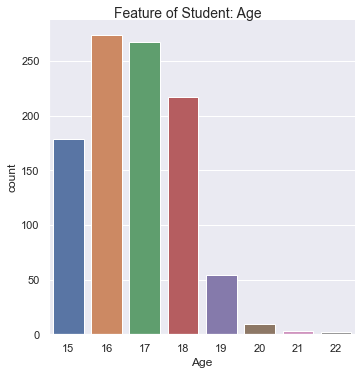

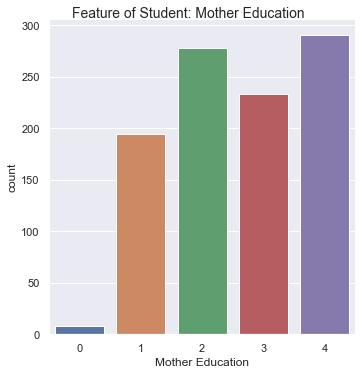

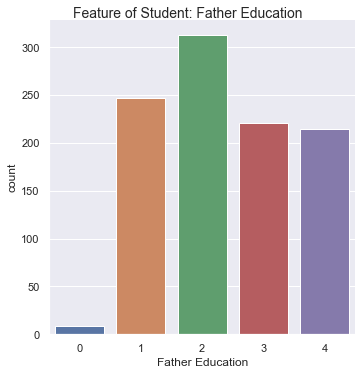

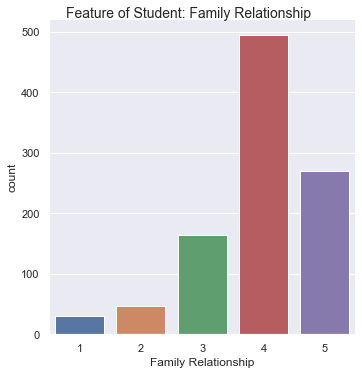

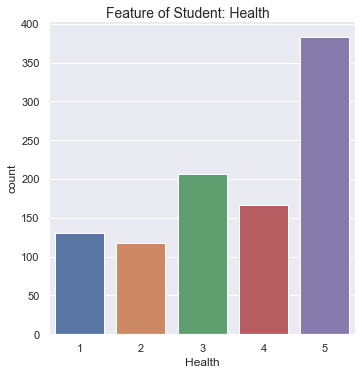

In [111]:
student_background = ['Age', 'Mother Education', 'Father Education', 'Family Relationship','Health']
for i in student_background:
    f = sb.catplot(data=df, x=i, kind='count')
    f.fig.suptitle('Feature of Student: {}'.format(i), y = 1, x=0.5, fontsize=14)

It seems most of the students are aged between 15 - 18. As for parents education levels, it is quite well distributed from the 2-4 range. The students health were aso mostly very well with a score of 5.

We will now look at the remaining 'numeric' features which pertain more to the individual students. We will be splitting by gender and school as these are features that are affected by those 2 factors. These features are:
* Travel Time
* Study Time
* Free Time
* Going Out

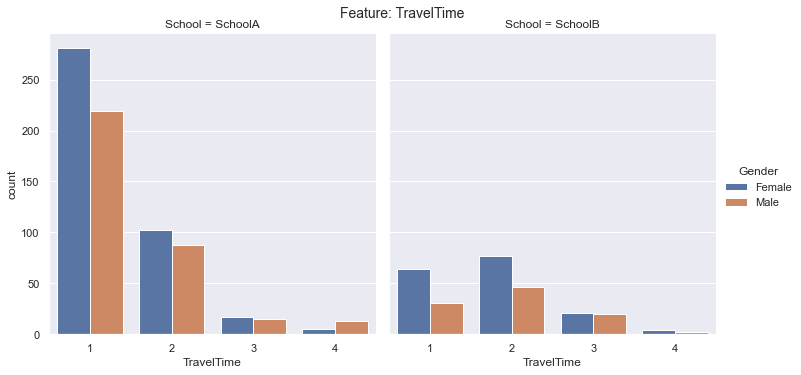

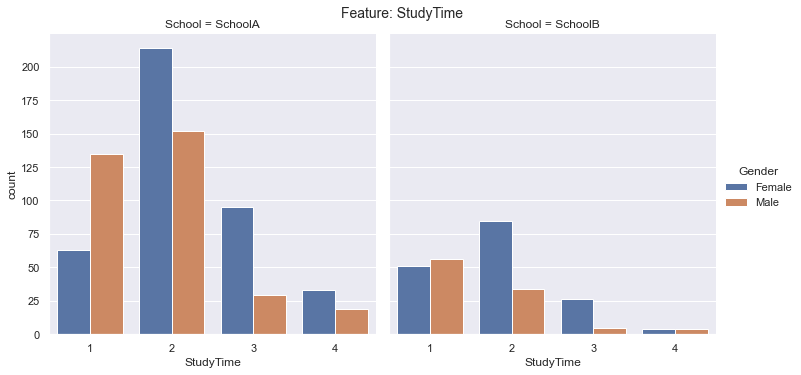

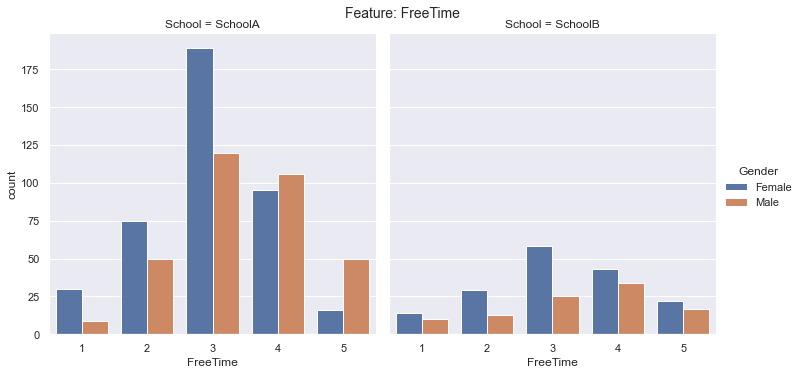

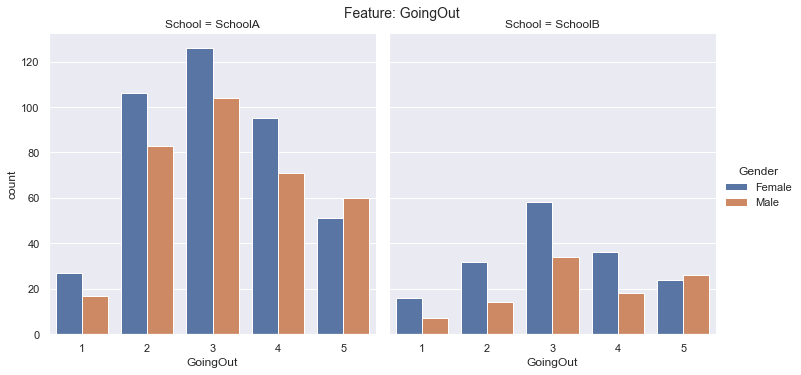

In [112]:
student_features = ['TravelTime','StudyTime','FreeTime',
                    'GoingOut']

for i in student_features:
    f = sb.catplot(data=df, x=i, kind='count', hue='Gender', col='School')
    f.fig.suptitle('Feature: {}'.format(i), y = 1, x=0.5, fontsize=14)

Nothing out of the ordinary here, 

* The average guy studied less than the average girl (seen by the higher 1h study time in guys than girls). 

* Girls had shorter travel time across both schools

* Girls in school B had more study and free time across all hours 

* Girls in school B had more free time up till above 5 hours

* Girls generally had more time for going out in both schools.(Could be related to shorter travel time?)



### Residence
<a class="anchor" id="2.4"></a>
Let us first try to find the distribution between Residence and School. We will visualise this with a count plot using `sb.countplot()`

Text(0.5, 1.0, 'Distribution of residence type by School')

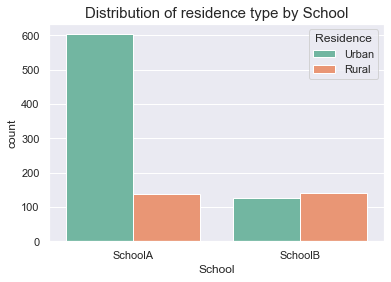

In [113]:
sb.countplot(data=df, hue = 'Residence', x='School',palette='Set2').set_title('Distribution of residence type by School', fontsize=15)

Immediately it becomes obvious that School A has a significantly higher proportion of students living in urban areas compared to rural, while in School B there is a slightly higher/close to equal number of students in rural than urban areas.

This could indicate that School B is situated near a rural area while School A is nearer to a urban area.

#### Could residence affect a students travel time to school?

Text(0.5, 1.0, 'Effect of Residence on Travel Time ')

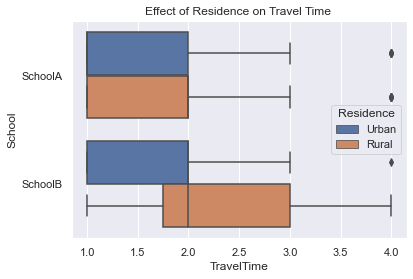

In [114]:
sb.boxplot(data=df, x = 'TravelTime', hue = 'Residence', y = 'School').set_title("Effect of Residence on Travel Time ")

The travel time for school A is pretty much the same regardless of where a student stays. However, for school B, we immediately notice that students in rural areas took <b>significantly</b> longer travel time

### Does Residence affect a students grades?
Initial guess: Urban areas are crowded and could face noise distraction which affects concentration. However, residence dont tell us much as in reality some students might stay in hostel.

<AxesSubplot:title={'center':'Math average against Residence'}, xlabel='School', ylabel='Term Math Avg'>

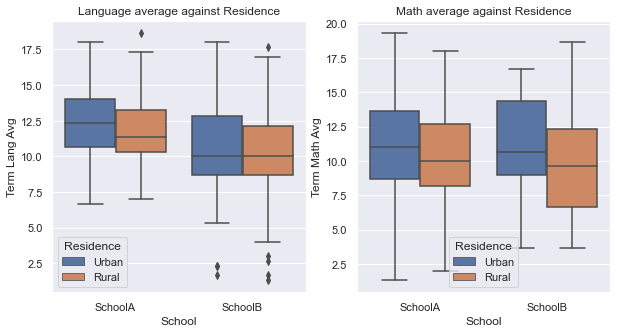

In [115]:
f, axes = plt.subplots(1,2 , figsize=(10,5))

axes[0].set_title("Language average against Residence",fontsize=12)
axes[1].set_title("Math average against Residence",fontsize=12)
sb.boxplot(data=df, y = 'Term Lang Avg', x='School',hue='Residence', ax=axes[0])
sb.boxplot(data=df, y = 'Term Math Avg', x='School',hue='Residence', ax=axes[1])

It is immediately noticable that students in School B who lived in Urban areas performed better than those in Rural areas. However, in School A, while the same is true, the bottom whiskers were much larger than those in rural areas meaning a wider distribution of results

However, we do not know the exact location of the school, nor if the Urban and Rural areas refer to a single location and hence our results are <b>inconclusive</b>. My guess would be School A is inbetween a Urban and Rural location where as School B is in a Urban location.

###### [Return to Table of Contents](#0.2)

Now that we have taken a look and explored our datasets briefly, let us try to dive deeper into this analysis by answering some questions...

<a class="anchor" id="3.1"></a>
### Question 1) Does the family background, family relationship and family support influence a student's performance?

We will try to identify the features that constitutes family background, relationship and support and plug them into `family_background`

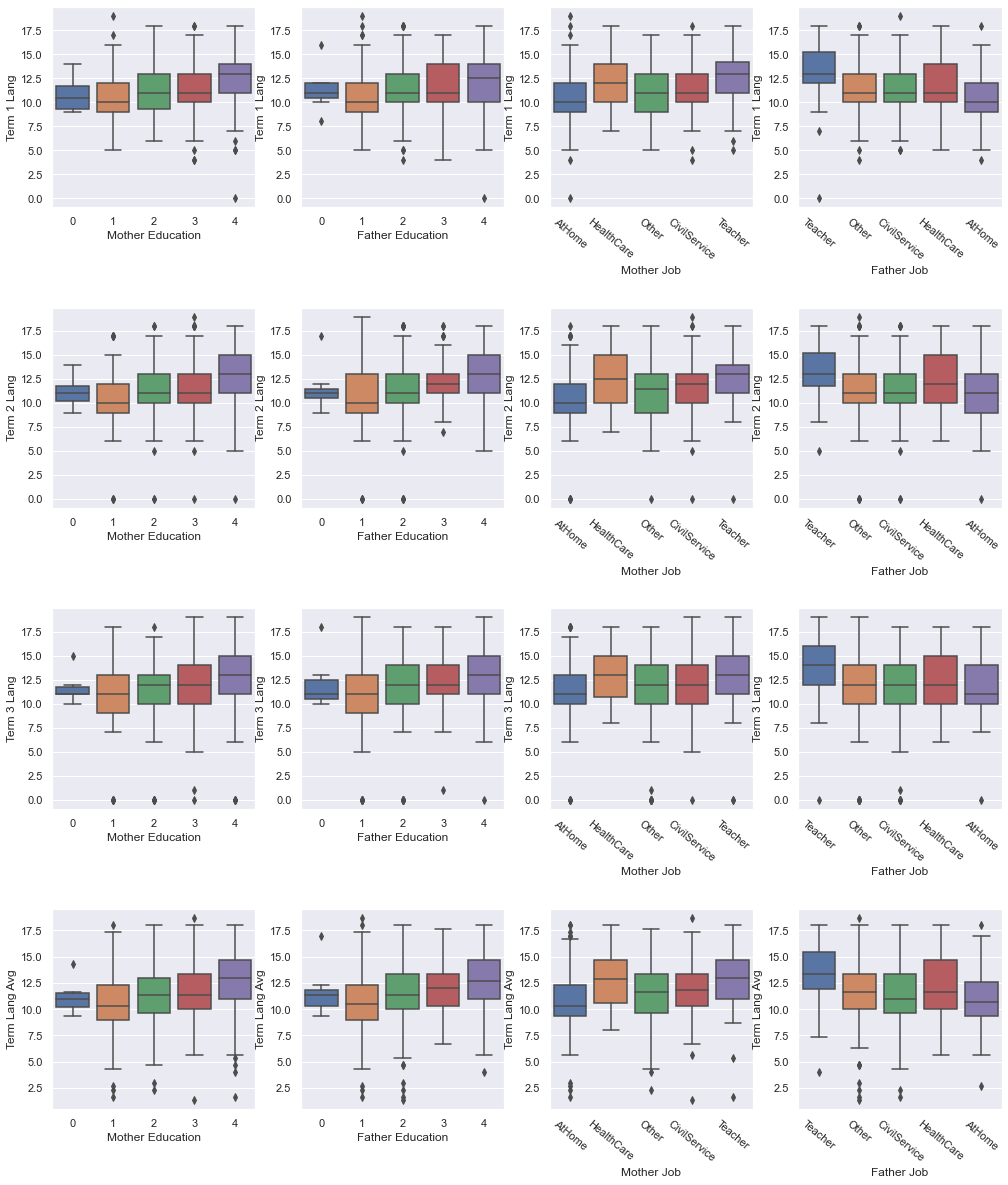

In [116]:
# Identifying family background features impact on Language
family_background = ['Mother Education', 'Father Education', 'Mother Job','Father Job']
term = ['Term 1 Lang', 'Term 2 Lang', 'Term 3 Lang','Term Lang Avg']
f, axes = plt.subplots(4, 4, figsize=(14,16))
count = 0
f.tight_layout()
f.subplots_adjust(hspace=0.5)
for i in term:
    sb.boxplot(data=df_lang, y=i, x = 'Mother Education', ax = axes[count, 0])
    sb.boxplot(data=df_lang, y=i, x = 'Father Education', ax = axes[count, 1])
    sb.boxplot(data=df_lang, y=i, x = 'Mother Job', ax = axes[count, 2]).set_xticklabels(df['Mother Job'].unique(), rotation=-40)
    sb.boxplot(data=df_lang, y=i, x = 'Father Job', ax = axes[count, 3]).set_xticklabels(df['Father Job'].unique(), rotation=-40)
    count+=1

### Considering the impact of family features on the overall average grades for students...

It is immediately noticable that a parents education has a growing impact on the students language grades. This is seen by the <b>small increase</b> in the quartiles for both Father and Mother with at least primary school education onwards. However, it is worthy to note that parents with <b>no education</b> had children performed similarly to those with 5th to 9th grade education. 

Reason:
* My guess would be due to children from this category feeling the need to work even harder

Observing the jobs of parents, it would appear that students with teachers as parents <b>generally performed better</b> while those with house parents performed poorer

Reason: 

* Having a teacher as a parent would certainly provide bonus education



Let us do the same thing but for the <b>mathematics</b> grades now

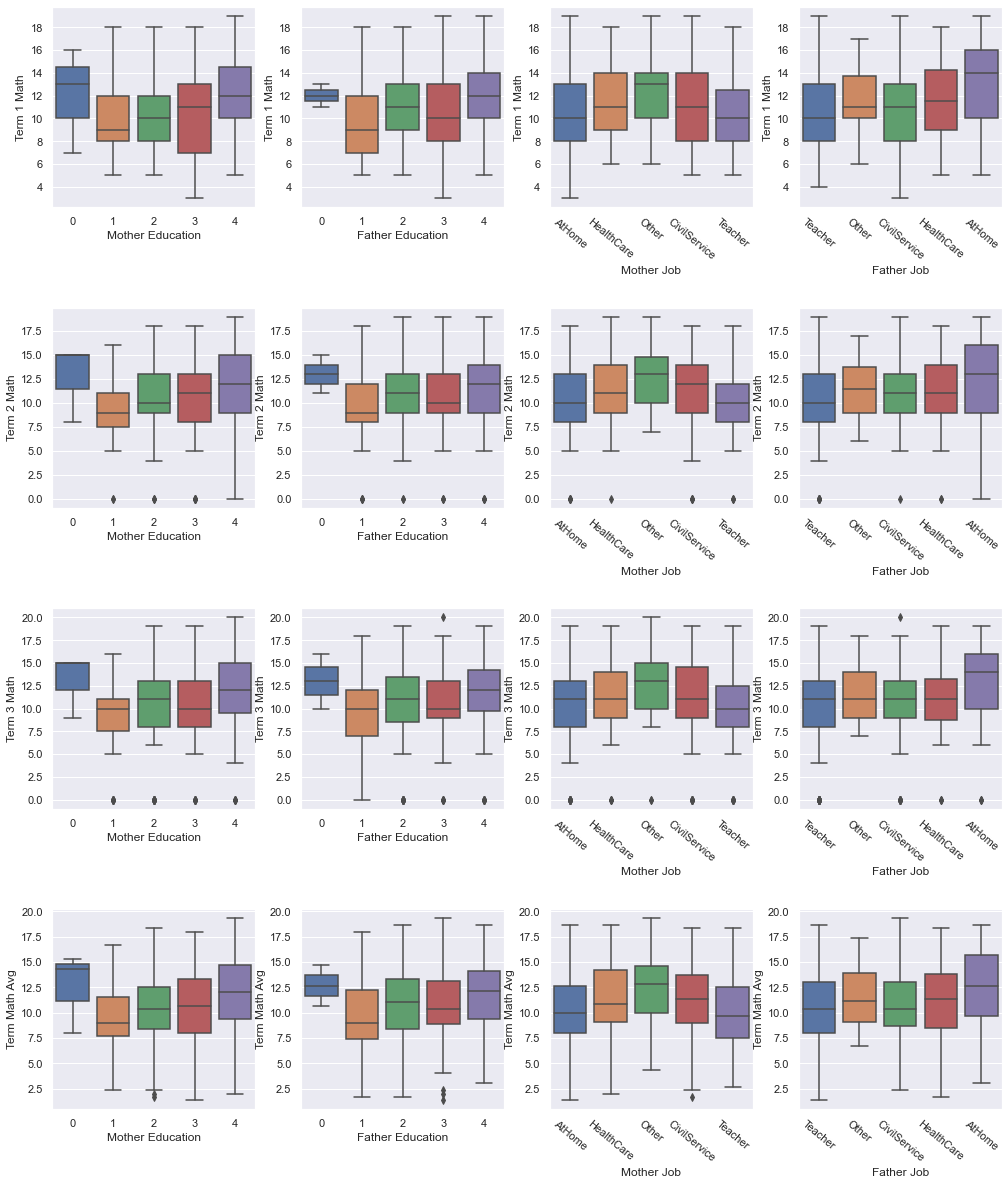

In [117]:
# Identifying family background features impact on Math
family_background = ['Mother Education', 'Father Education', 'Mother Job','Father Job']
term = ['Term 1 Math', 'Term 2 Math', 'Term 3 Math','Term Math Avg']
f, axes = plt.subplots(4, 4, figsize=(14,16))
count = 0
f.tight_layout()
f.subplots_adjust(hspace=0.5)
for i in term:
    sb.boxplot(data=df_math, y=i, x = 'Mother Education', ax = axes[count, 0])
    sb.boxplot(data=df_math, y=i, x = 'Father Education', ax = axes[count, 1])
    sb.boxplot(data=df_math, y=i, x = 'Mother Job', ax = axes[count, 2]).set_xticklabels(df['Mother Job'].unique(), rotation=-40)
    sb.boxplot(data=df_math, y=i, x = 'Father Job', ax = axes[count, 3]).set_xticklabels(df['Father Job'].unique(), rotation=-40)
    count+=1

We will be considering the impact of family features on the <b>overall average grades</b> for math students. Similarly to language students grades, a growing education level from 1-4 is related to higher grades achieved. However, for non educated parents, their children performed distinctly better than the other education levels

Observing the jobs of parents, it would seem that having parents who are teachers instead lead to poorer performing children. Could it be due to parents not being teachers in the subject? However, the <b>Other</b> is representative of many other job sectors and hence the information is <b>inconclusive</b> on whether a parents jobs does influence their grades. One would need more information about the jobs to make a proper conclusion

<a class="anchor" id="3.2"></a>

Let us try to see if the `Family Relationship` has an impact on the overall grades

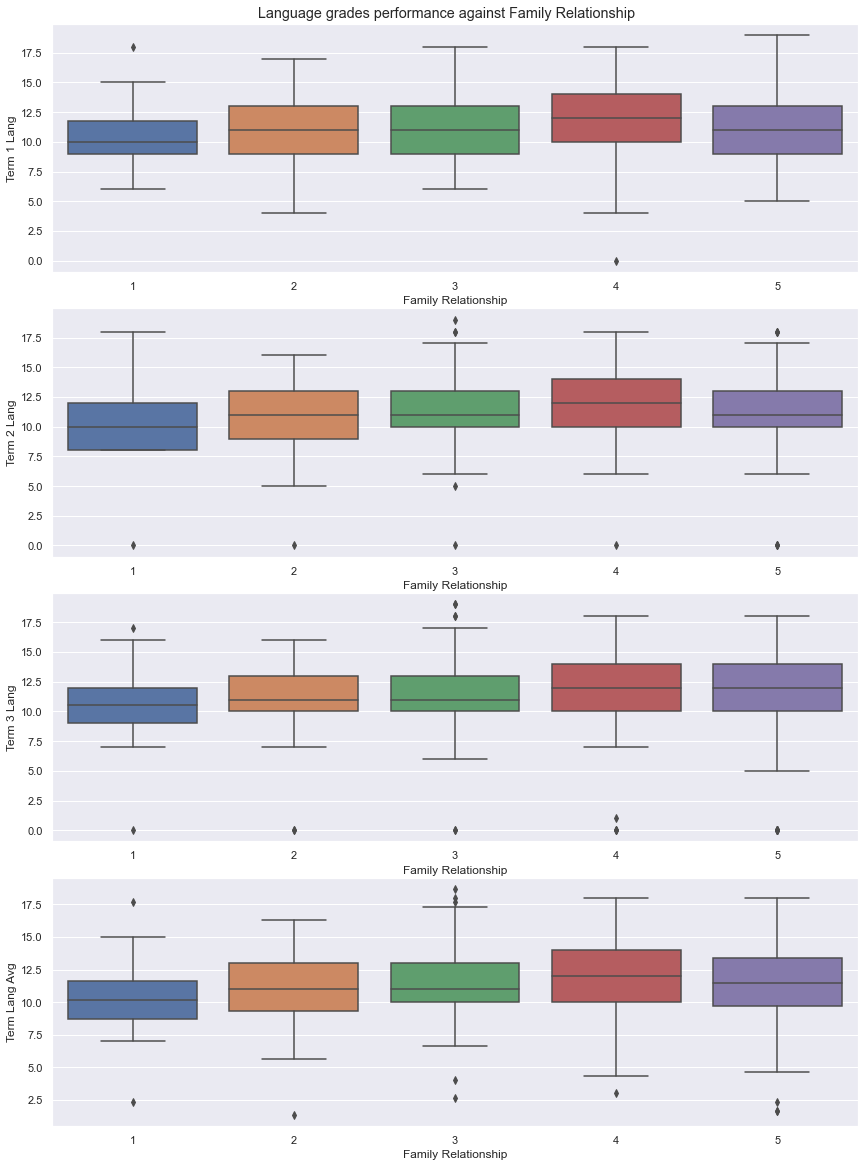

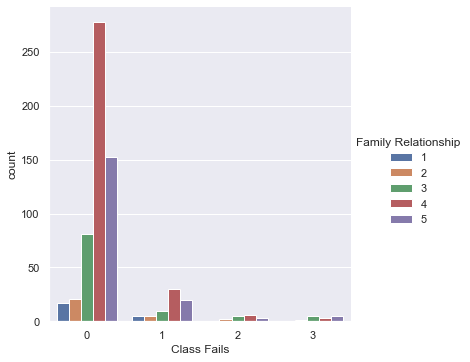

In [118]:
# Let us observe the Boxplot of students performance across the terms based on their family relationship scale
f, axes = plt.subplots(4, 1, figsize=(12,16))
count = 0
f.tight_layout()
f.suptitle('Language grades performance against Family Relationship', y = 1)
family_features = ['Term 1 Lang', 'Term 2 Lang', 'Term 3 Lang','Term Lang Avg']
for i in family_features:
    sb.boxplot(data = df_lang, y = i, x = 'Family Relationship',ax = axes[count])
    count+=1
sb.catplot(data =df_lang, x='Class Fails', kind='count', hue='Family Relationship')

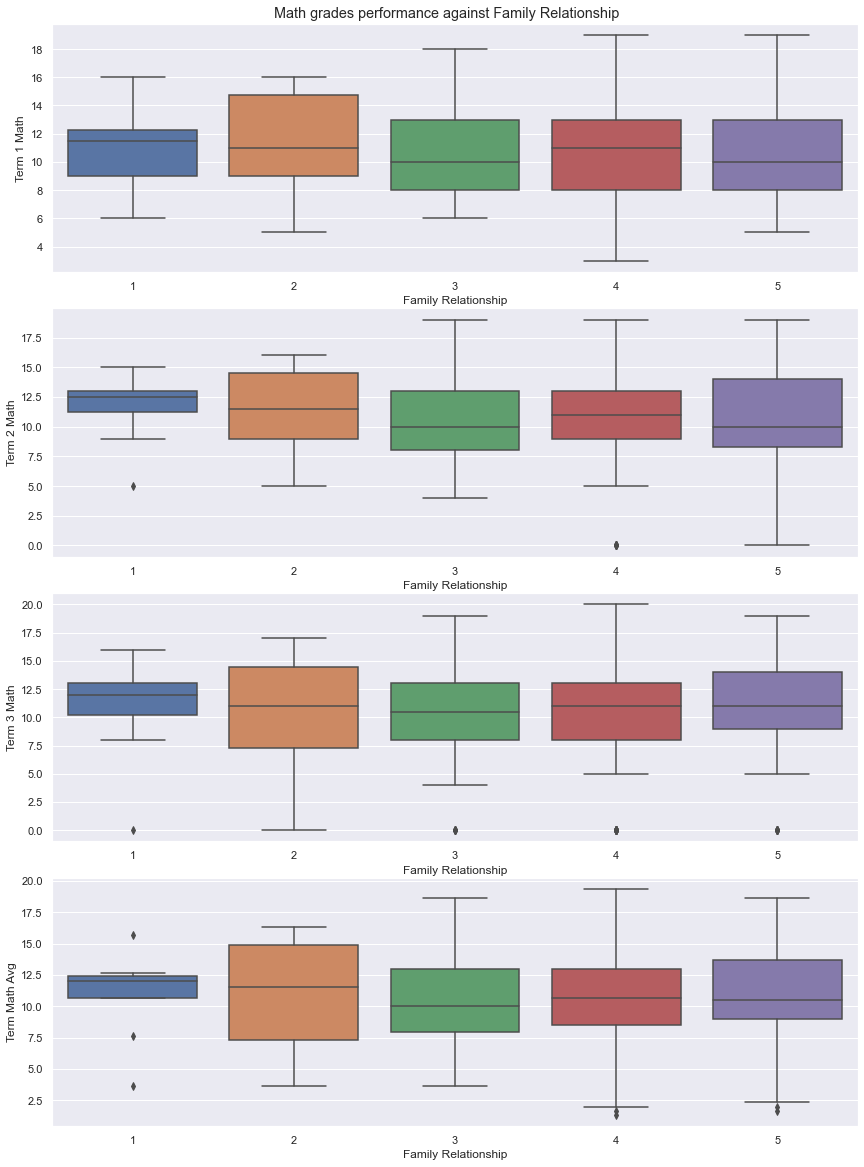

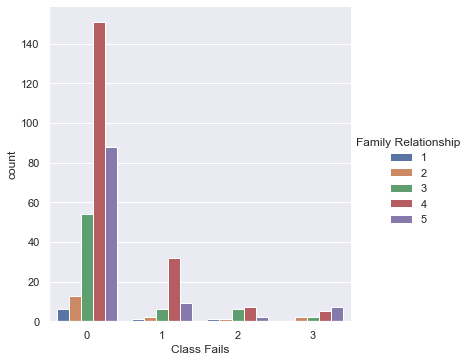

In [119]:
# Let us observe the Boxplot of students performance across the terms based on their family relationship scale
f, axes = plt.subplots(4, 1, figsize=(12,16))
count = 0
f.tight_layout()
f.suptitle('Math grades performance against Family Relationship', y = 1)
family_features = ['Term 1 Math', 'Term 2 Math', 'Term 3 Math','Term Math Avg']
for i in family_features:
    sb.boxplot(data = df_math, y = i, x = 'Family Relationship',ax = axes[count])
    count+=1
sb.catplot(data =df_math, x='Class Fails', kind='count', hue='Family Relationship')

##### Language:
Looking at the boxplots of a students performance against their family relationship, we can conclude that family relationship does have a small impact on a students language grades. Better family relationship generally had minor increases in students average grades 

###### Math: 
Looking at the boxplots, family relationship does not seem to affect a students math grades at all.

<b>Conclusion</b>: Family relationship doesnt really play much of a role in whether or not a student does well
<a class="anchor" id="3.3"></a>

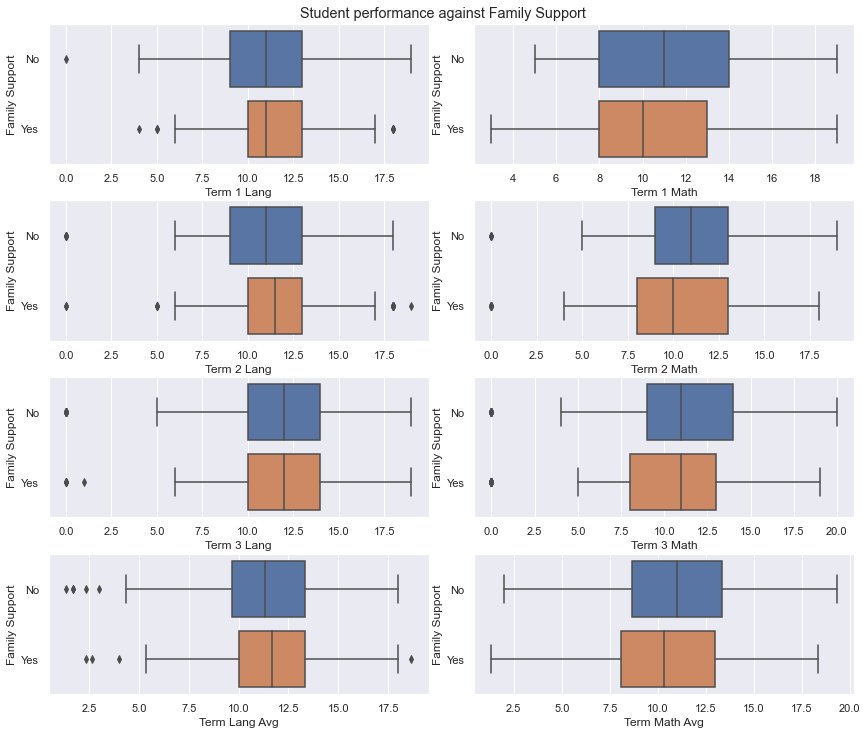

In [120]:
# Let us observe the Boxplot of students performance across the terms based on their family relationship scale

f, axes = plt.subplots(4, 2, figsize=(12,10))
count = 0
f.tight_layout()
f.suptitle('Student performance against Family Support', y = 1)
family_features = ['Term 1 Lang', 'Term 2 Lang', 'Term 3 Lang','Term Lang Avg']
for i in family_features:
    sb.boxplot(data= df_lang, x = i,y='Family Support', ax=axes[count,0])
    count+=1
    

count = 0

family_features = ['Term 1 Math', 'Term 2 Math', 'Term 3 Math','Term Math Avg']
for i in family_features:
    sb.boxplot(data= df_math, x = i,y='Family Support', ax=axes[count,1])
    count+=1

Looking at the boxplots of a students performance against his family support, we can conclude that having one's family support <b>does not impact one's grade significantly</b>. Students taking language did mildly better while those taking math did poorer when they had family support. Since these numbers are contradicting i would say they dont play much of a role

Hence it should be safe to conclude that Family support does not infuence a students performance as much.

<a class="anchor" id="3.4"></a>

### Conclusion: 
Parents Education/Jobs does have an impact on their child/student's grades, <b>however</b>, as `other` covers a wide scope of jobs that we are unable to identify, we cannot accurately deduce the job that affects a students grades the most as there is <b>insufficient information</b>. Furthermore, the impact of these features are different for different subjects (Math and Language). It is conclusive that having uneducated parents certainly led to better performing academic results. 

Additionally, family relationship does have a minor impact on language students grades but not really so on math students. As for family support, it has unexpectedly not seem to play an impact on students grades

###### [Return to Table of Contents](#0.3)

<a class="anchor" id="4.1"></a>
### Question 2: What can a student do (attributes that they can control) to improve their performance in these subjects?

We will try to extract out the attributes that a student might be able to influence and store them `student_attributes`.

In [121]:
# Identifying the attributes that a student can control
student_attributes = ['TravelTime','StudyTime','Tution','CCA','Internet','Romantic','FreeTime','GoingOut','Health','School Absenty']
student_df = df_lang[student_attributes]

# Let us append the students grades in now that we have cleaned this data
student_df = pd.concat([student_df, df_lang[['Term 1 Lang','Term 2 Lang','Term 3 Lang','Term Lang Avg']]], axis = 1)

Let us look at how the categorical features in the attributes controlled by a student affects their average grade. We will first plot this with Language results

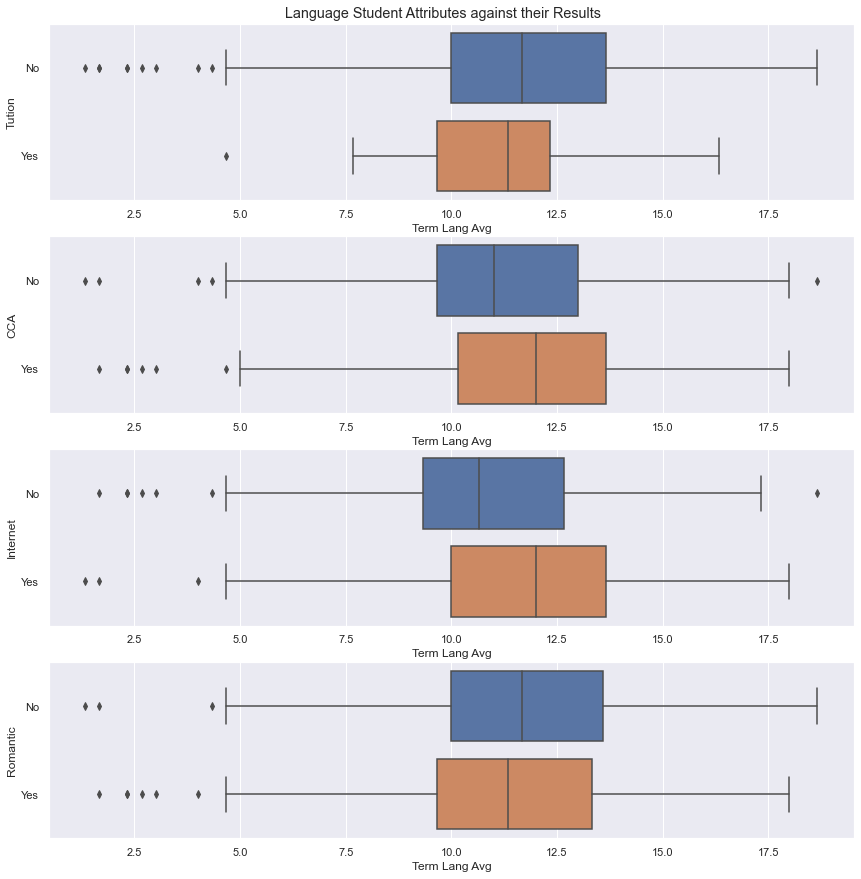

In [122]:
f, axes = plt.subplots(4, 1, figsize=(12,12))
count = 0
f.tight_layout()
f.suptitle('Language Student Attributes against their Results', y = 1)
for i in student_attributes:
    if df_lang[i].dtypes == np.int64:
        continue
    sb.boxplot(data= df_lang, x = 'Term Lang Avg',y=i, ax=axes[count])
    count+=1

Tution:
* For students with tution/paidsup, the overall average results were generally similar w/ or w/out the additional classes. However, it is worth nothing the higher number of anomalies (poorly scoring students) from those without tuiton.

CCA:
* Students with CCA performed higher than those without CCA.

Internet:
* For students with internet, there was the greatest difference in the median values. Across the 25th, 50th and 75th percentile, they did better than students with no internet.

Romance:
* For students in a romantic relationship, they performed slightly worst than those without a romantic relationship across the whiskers and quartiles.

##### Time to do the exact same for Math Students as well!

In [123]:
student_attributes = ['TravelTime','StudyTime','Tution','CCA','Internet','Romantic','FreeTime','GoingOut','Health','School Absenty']
student_df = df_math[student_attributes]

# Let us append the students grades in now that we have cleaned this data
student_df = pd.concat([student_df, df_math[['Term 1 Math','Term 2 Math','Term 3 Math','Term Math Avg']]], axis = 1)

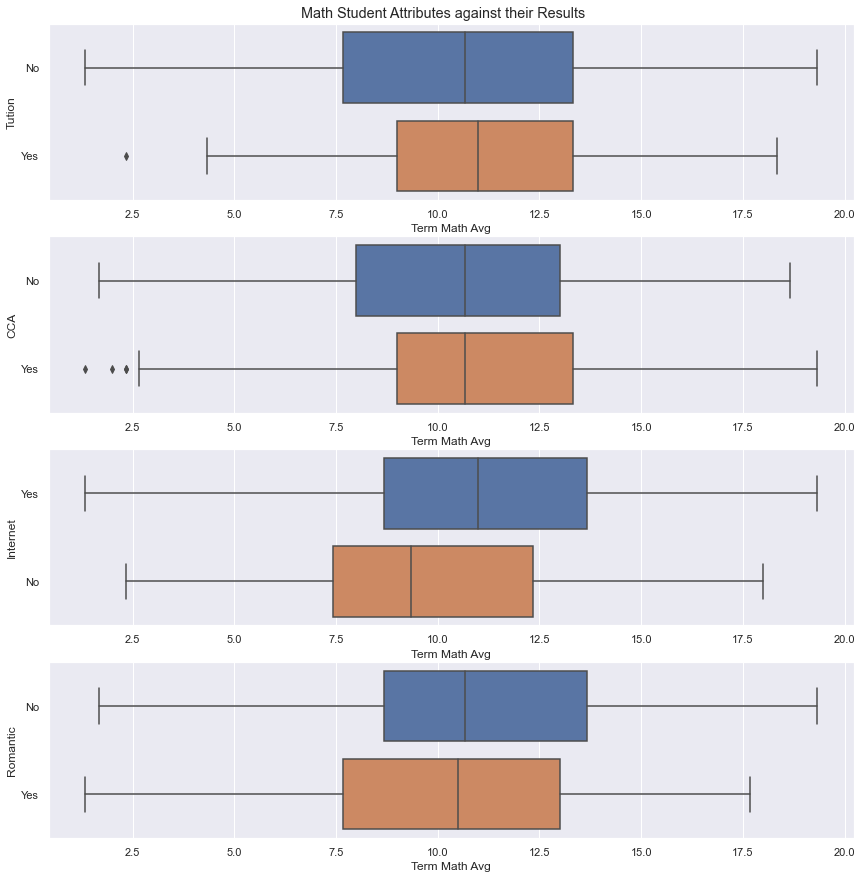

In [124]:
# Let us look at how the categorical features controlled by a student affects their average grade

f, axes = plt.subplots(4, 1, figsize=(12,12))
count = 0
f.tight_layout()
f.suptitle('Math Student Attributes against their Results', y = 1)
for i in student_attributes:
    if df_math[i].dtypes == np.int64:
        continue
    sb.boxplot(data= df_math, x = 'Term Math Avg',y=i, ax=axes[count])
    count+=1

Math Tution/PaidSup:
* Students with Tution performed slightly better

CCA:
* Students with CCA performed similarly than those without CCA.

Internet:
* For students with internet, there was the greatest difference in the median values. Across the 25th, 50th and 75th percentile, they did better than students with no internet.

Romance:
* For students in a romantic relationship, they performed slightly worst than those without a romantic relationship across the whiskers and quartiles.

Overall between both subjects, the observation was quite similarly <b>except</b> when it comes to the effect of CCA
<a class="anchor" id="4.2"></a>

### Let us look at the numerical attributes that a student can control

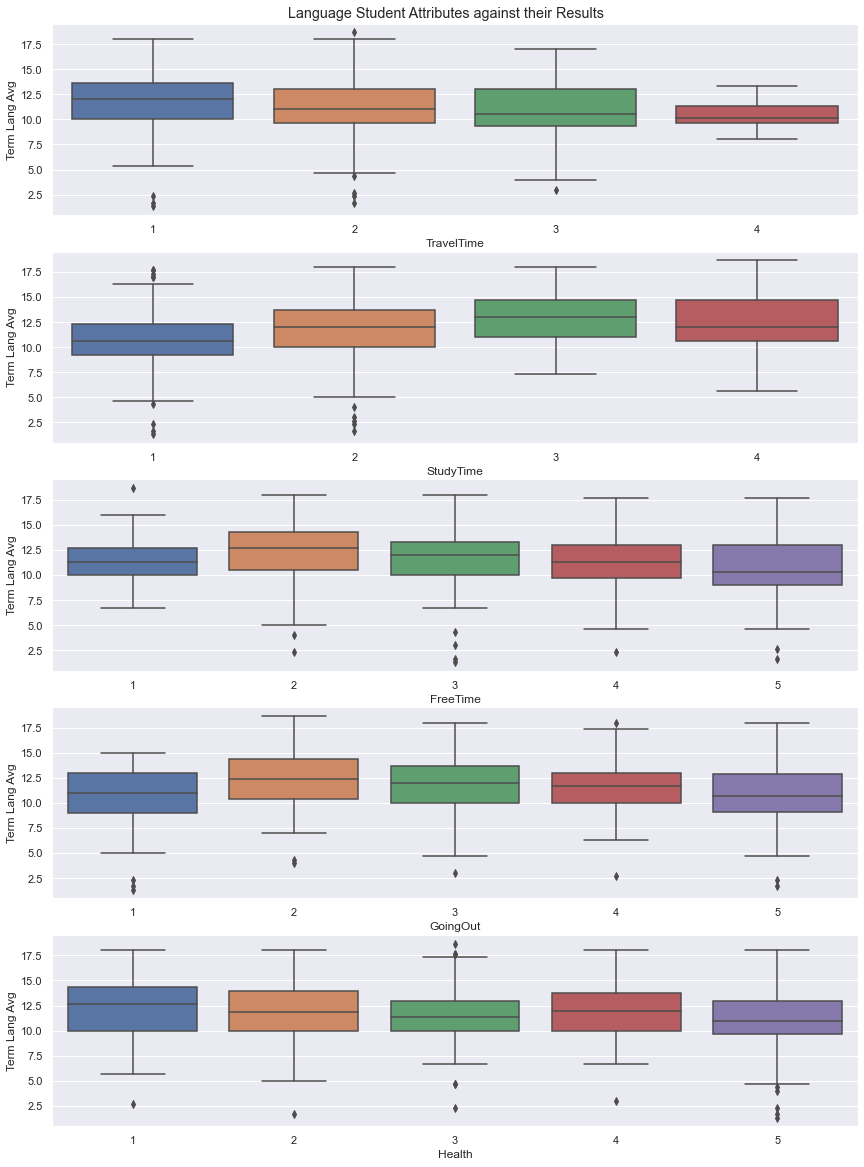

In [125]:
student_attributes = ['TravelTime','StudyTime','Tution','CCA','Internet','Romantic','FreeTime','GoingOut','Health','School Absenty']
student_df = df_lang[student_attributes]
student_df = pd.concat([student_df, df_lang[['Term 1 Lang','Term 2 Lang','Term 3 Lang','Term Lang Avg']]], axis = 1)

# Let us look at how the numerical features controlled by a student affects their average grade

f, axes = plt.subplots(5, 1, figsize=(12,16))
count = 0
f.tight_layout()
f.suptitle('Language Student Attributes against their Results', y = 1)
for i in student_df.select_dtypes([np.int64,np.float64]):
    if i == 'Term 1 Lang' or i == 'Term 2 Lang' or i == 'Term 3 Lang' or i == 'Term Lang Avg' or i == 'School Absenty':
        continue
    sb.boxplot(data= df_lang, y = 'Term Lang Avg',x=i, ax=axes[count])
    count+=1

<b>Travel Time</b>
* Students with shorter travel time performed slightly better than those who took longer. However their median all feel within the 12.5 - 10.0 grade range

<b>Study Time</b>
* Students who invested more time into studying did better generally. However for those spending over 10 hours, their median and lower quartile was slightly worser than those studying 5-10 hours

<b>Free Time/Going Out/Health</b>
* There does not seem to be a consistent relation between a students language grades and these factors

##### Time to do the same for Math students!

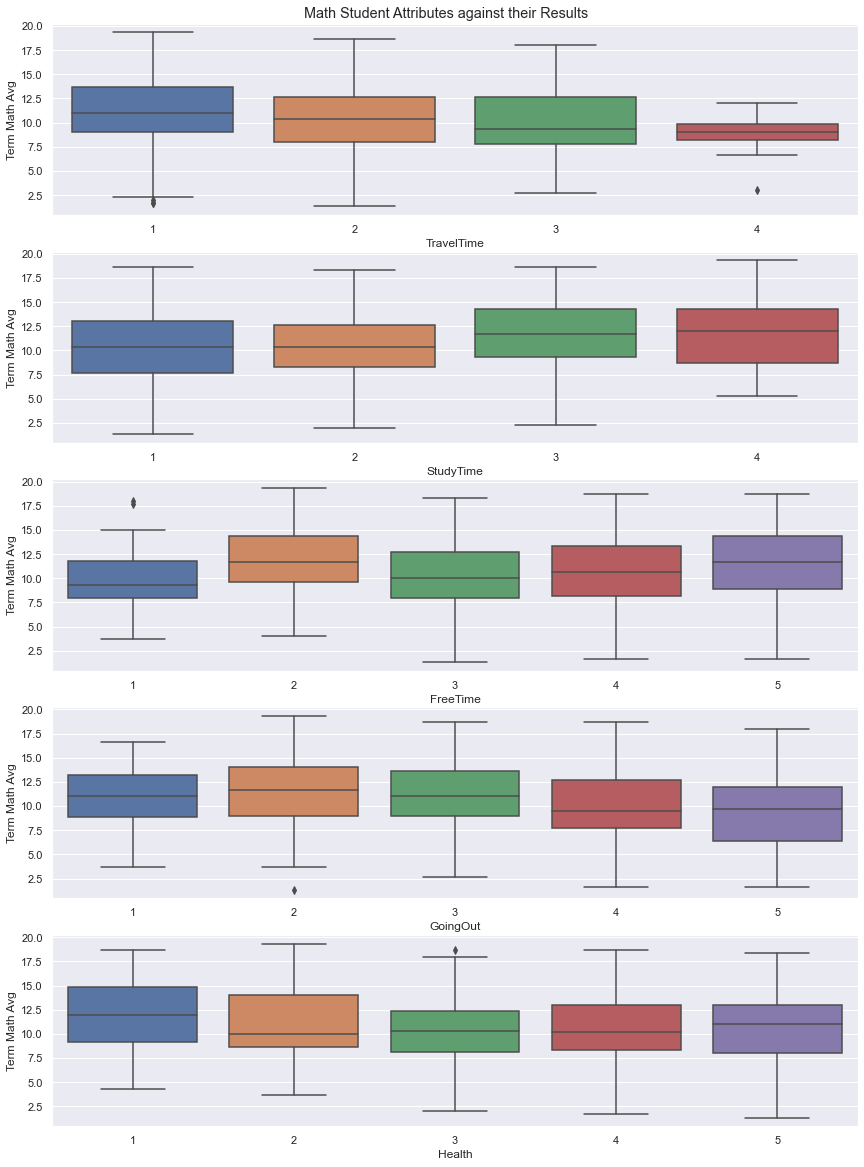

In [126]:
student_attributes = ['TravelTime','StudyTime','Tution','CCA','Internet','Romantic','FreeTime','GoingOut','Health','School Absenty']
student_df = df_math[student_attributes]
student_df = pd.concat([student_df, df_math[['Term 1 Math','Term 2 Math','Term 3 Math','Term Math Avg']]], axis = 1)

# Lets look at Math Students now
f, axes = plt.subplots(5, 1, figsize=(12,16))
count = 0
f.tight_layout()
f.suptitle('Math Student Attributes against their Results', y = 1)
for i in student_df.select_dtypes([np.int64,np.float64]):
    if i == 'Term 1 Math' or i == 'Term 2 Math' or i == 'Term 3 Math' or i == 'Term Math Avg' or i == 'School Absenty':
        continue
    sb.boxplot(data= df_math, y = 'Term Math Avg',x=i, ax=axes[count])
    count+=1

<b>Travel Time</b>
* Students with shorter travel time performed slightly better than those who took longer. However their median all feel within the 12.5 - 10.0 grade range

<b>Study Time</b>
* Students who invested more time into studying did better generally.

<b>Free Time/Going Out</b>
* There does not seem to be a consistent relation between a students language grades and these factors

<b>Health</b>
* The results were generally consistent with the exception of students with very bad health (1) who performed better than the rest by a decent amount

### However...
It is <b>insufficient</b> to make a full definitive conclusion on Free Time/Going Out as there is insufficient information on what the students use this time for. Students might use their free time to meet their friends to study as well which either coincides with study time or is not accounted for. Hence knowing this factor, we should be cautious about the impact of Free Time and whether it impacts a students performance

### School Absence (Skipping school) is a student controlled attribute
Let us try to observe whether missing school affects results. Since the bivariate features are of non category, let us try to use `sb.jointplot()`

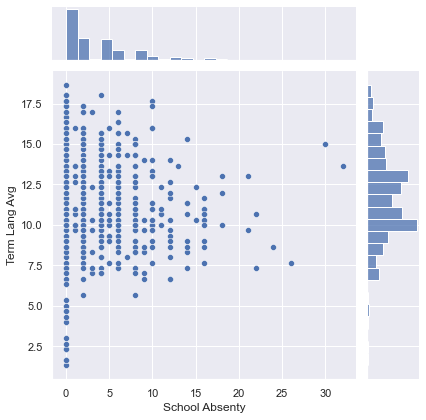

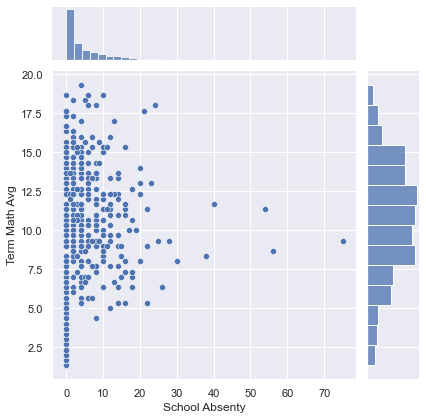

In [127]:
sb.jointplot(data=df_lang, x = 'School Absenty', y = 'Term Lang Avg')
sb.jointplot(data=df_math, x = 'School Absenty', y = 'Term Math Avg')

It appears that School Absence does not really influence the grade

### Correlation between results and attributes
Can we try to find a correlation between the numerical attributes chosen earlier with `.corr()` method:

<AxesSubplot:>

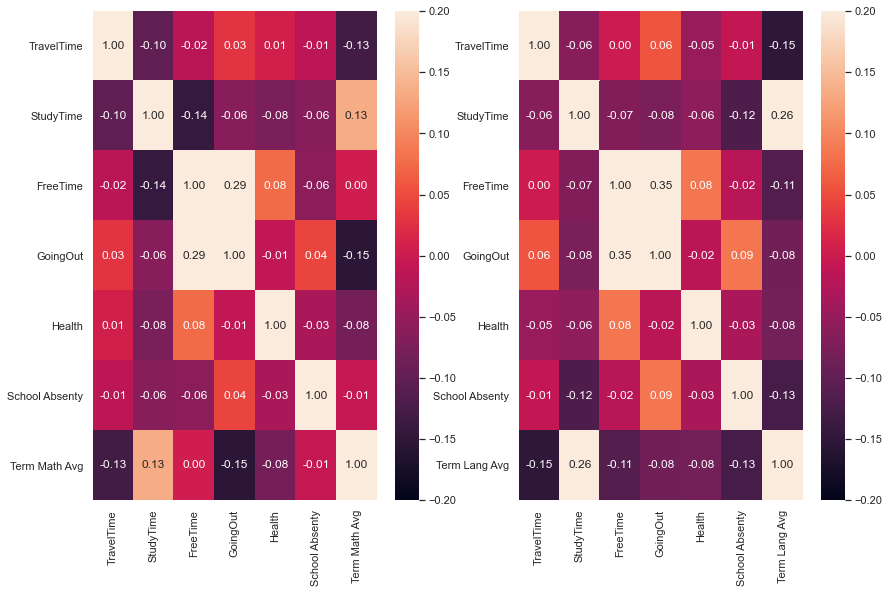

In [128]:
# We will now try to observe the correlation these 'numeric' variables have on a students grades
f, axes = plt.subplots(1,2, figsize=(14,9))
student_df = df_math[student_attributes]
student_df = pd.concat([student_df, df_math[['Term 1 Math','Term 2 Math','Term 3 Math','Term Math Avg']]], axis = 1)
sb.heatmap(student_df.select_dtypes([np.int64,np.float64]).drop(columns=['Term 1 Math', 'Term 2 Math', 'Term 3 Math']).corr(), annot = True, fmt = '0.2f', vmax = 0.2, vmin = -0.2,ax=axes[0])
student_df = df_lang[student_attributes]
student_df = pd.concat([student_df, df_lang[['Term 1 Lang','Term 2 Lang','Term 3 Lang','Term Lang Avg']]], axis = 1)
sb.heatmap(student_df.select_dtypes([np.int64,np.float64]).drop(columns=['Term 1 Lang', 'Term 2 Lang', 'Term 3 Lang']).corr(), annot = True, fmt = '0.2f', vmax = 0.2, vmin = -0.2,ax=axes[1])

### Conclusion:
There are some attributes that a student can influence that will potentially help them to perform better in an exam. The <b>table below</b> are the optimal values recommended for subjects from my observations

It is important to note that  most of these "numeric" features were seemingly more like categorical variables as they represent a range. For example 1 in study time meant < 2 hours. However, i have decided to keep it as numeric in order to observe if the correlation could reveal more information not visual in the graph
<a class="anchor" id="4.3"></a>

In [129]:
print("Attributes that a student should follow based on subject taken: ")
data = [['Yes', 'No','Yes','Yes','1','4'],['No','No','Yes','Yes','1','4']]
reco = pd.DataFrame(data, columns=['Tution/Paidsup','Relationship','CCA','Internet','Travel Time','Study Time'])
reco.index = ['Math','Language']
reco

Attributes that a student should follow based on subject taken: 


,Tution/Paidsup,Relationship,CCA,Internet,Travel Time,Study Time
Math,Yes,No,Yes,Yes,1,4
Language,No,No,Yes,Yes,1,4


###### [Return to Table of Contents](#0.4)

<a class="anchor" id="5.1"></a>
### Question 3: What can schools do (attributes that they can control) to help students perform better in these subjects?

Features that we would consider that schools can control:
* School Support
* CCA
* Internet

As we had already observed, CCA and subscribing to an Internet both play a <b>large role</b> in helping students perform in both subjects. Hence Schools should make it compulsory for students to attend a CCA as well as provide internet services for students who are unable to afford an internet subscription


<AxesSubplot:xlabel='Internet', ylabel='Term Math Avg'>

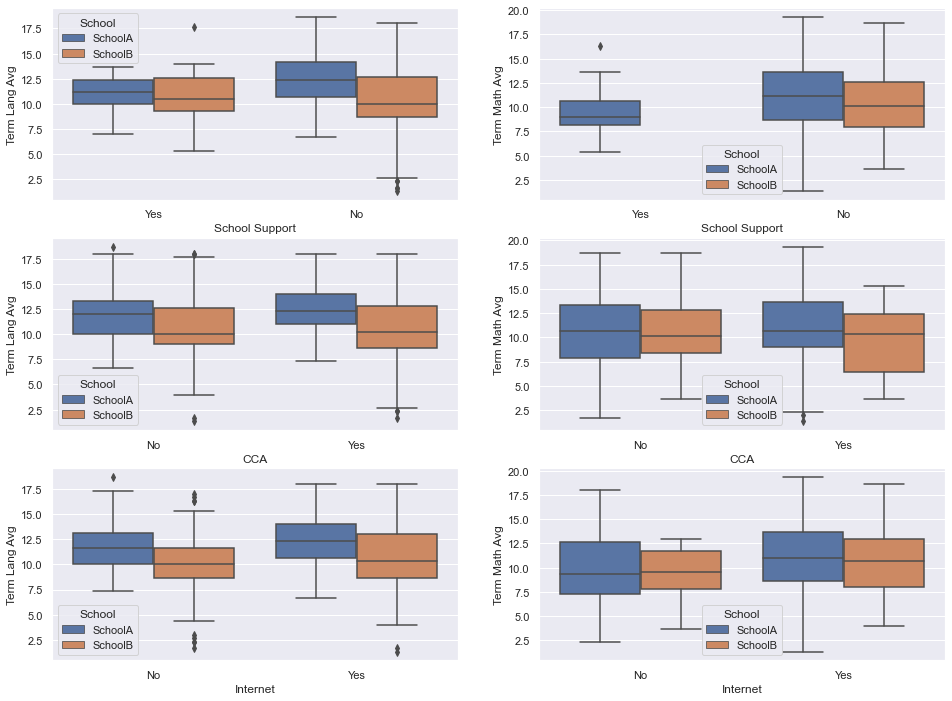

In [130]:
# We will now take a look at School Support
f, axes = plt.subplots(3,2, figsize = (16,12))
sb.boxplot(data=df, x = 'School Support', y='Term Lang Avg', ax=axes[0,0],hue='School')
sb.boxplot(data=df, x = 'School Support',y='Term Math Avg', ax=axes[0,1],hue='School')
sb.boxplot(data=df, x = 'CCA', y='Term Lang Avg', ax=axes[1,0],hue='School')
sb.boxplot(data=df, x = 'CCA',y='Term Math Avg', ax=axes[1,1],hue='School')
sb.boxplot(data=df, x = 'Internet', y='Term Lang Avg', ax=axes[2,0],hue='School')
sb.boxplot(data=df, x = 'Internet',y='Term Math Avg', ax=axes[2,1],hue='School')

Language:

* School A: Students with no school support <b>performed better</b> than those with 
* School B: Students with school support <b>performed better</b> than those without on average, however there is greater variance in those without school support meaning their better students also did much better

Math:

* School A: Students with no school support <b>performed much better</b> than those with
* School B: <b>All students</b> did not have school support
<a class="anchor" id="5.2"></a>

### Conclusion

* Both Schools should make CCA compulsory, as in both Q2 and Q3 it has been shown students with CCA perform slightly better
* Schools should provide internet services for all their students

While students can subscribe to internet, not all of them are able to afford it, hence the school should provide free internet to facilitate their learning. 
* School Support does not seem to positively influence grades

However, logical explanation would be because school support is only given to students who need them aka. students doing worser academically


###### [Return to Table of Contents](#0.5)

<a class="anchor" id="6.1"></a>
### Question 4: Which school has a better overall student performance in these two subjects? Why do you think that is?

We had previous observed the gender distribution across the schools during our [Initial EDA](#special1) above, however we should take a look at the population difference between the schools using `sb.catplot()`:

Text(0.5, 1.0, 'School Population difference')

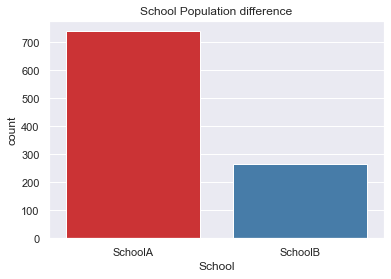

In [131]:
sb.countplot(data=df, x='School',palette='Set1').set_title('School Population difference')

There is a significantly higher number of students in SchoolA then SchoolB. From this, im expecting a higher <b>variance</b> in the results of SchoolA

<AxesSubplot:xlabel='School', ylabel='count'>

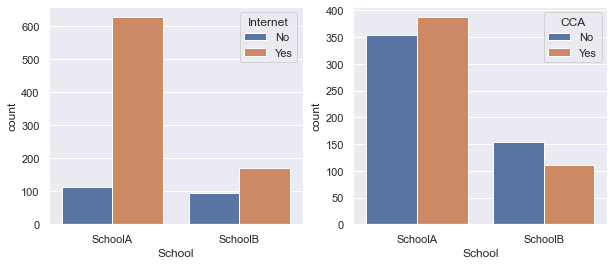

In [132]:
f, axes = plt.subplots(1,2,figsize=(10,4))
sb.countplot(data=df, x='School', hue='Internet',ax=axes[0])
sb.countplot(data=df, x='School', hue='CCA',ax=axes[1])

Let us plot the language and math grades between both schools by storing their grades in `results`

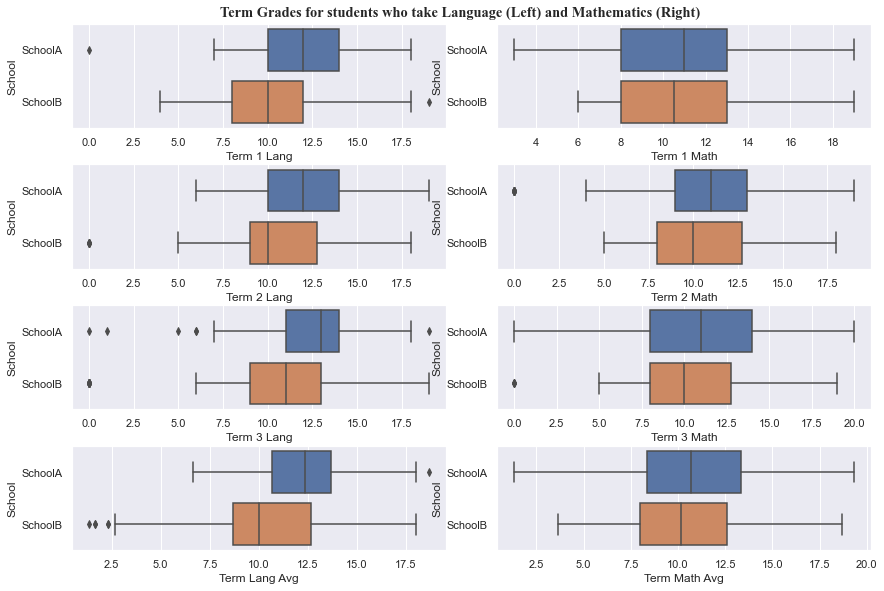

In [133]:
# Looking at Language grades for Schools
results = ['Term 1 Lang','Term 2 Lang','Term 3 Lang','Term Lang Avg']
f,axes = plt.subplots(4,2, figsize=(12,8))
f.tight_layout()
f.suptitle("Term Grades for students who take Language (Left) and Mathematics (Right)", y = 1, fontname = "Times New Roman", fontweight = "bold")
count = 0
for i in results:
    sb.boxplot(data = df_lang, ax=axes[count, 0], orient='h', x =i, y='School')
    count+=1
# Looking at Maths grades for Schools
results = ['Term 1 Math','Term 2 Math','Term 3 Math','Term Math Avg']
count = 0
for i in results:
    sb.boxplot(data = df_math, ax=axes[count,1], orient='h', x =i, y='School')
    count+=1

<a class="anchor" id="6.2"></a>
### Conclusion:
It seems that students in School A <b>performed better</b> than School B overall

###### Language

* Across all 3 Term: School A median is much higher than School B median (which is even lower than School A lower quartile)

###### Math

* Term 1: Similar score with slightly higher Q2. However the minimum range is much lower in School A than B
* Term 2: School A performed better than School B on all 3 quartiles
* Term 3: Results were similar to that of Term 1

Why:
 
- School A has more students living in Urban areas (which we concluded earlier, led to them doing better)
- A <b>much higher proportion</b> of School A students have <b>access to internet</b>
- A <b>much higher proportion</b> of School A students have <b>CCA</b>

Ultimately, it would appear that School A students are <b>more well equipped</b> than School B students. Furthermore, School A students have <b>greater diversity</b> which does help study-play balance leading to better results. (eg. School A could be a top 5 JC and School B could be an average JC).

###### [Return to Table of Contents](#0.6)

### Question 5: How do the students perform over time? Are they consistent across terms, or do they gradually improve?
<a class="anchor" id="7.1"></a>

To observe students performance overtime, we need to compare the progress of their term grades. Let us try to see if `student_results.describe()` can reveal any information

The same table was done [here](#special1) at the initial EDA

In [134]:
student_results = df[['Term 1 Lang','Term 2 Lang','Term 3 Lang','Term 1 Math','Term 2 Math','Term 3 Math']]
student_results.describe()

,Term 1 Lang,Term 2 Lang,Term 3 Lang,Term 1 Math,Term 2 Math,Term 3 Math
count,649.000000,649.000000,649.000000,395.000000,395.000000,395.000000
mean,11.399076,11.570108,11.906009,10.908861,10.713924,10.415190
std,2.745265,2.913639,3.230656,3.319195,3.761505,4.581443
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,8.000000,9.000000,8.000000
50%,11.000000,11.000000,12.000000,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000,19.000000,19.000000,20.000000


Let us try to extract the mean values `mean` and plot them in a scatterplot using the `sb.scatterplot()` method

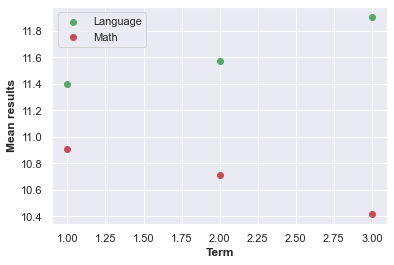

In [135]:
mean = []
for i in student_results:
    mean.append(df[i].mean())

l= sb.scatterplot(x=[1,2,3], y = mean[0:3]).set_ylabel('Mean results',fontweight="bold")
l= sb.scatterplot(x=[1,2,3], y = mean[0:3]).set_xlabel('Term',fontweight="bold")
l = plt.scatter(x=[1,2,3],y=mean[0:3])
m = plt.scatter(x=[1,2,3],y=mean[3:6])
plt.legend((l,m),("Language",'Math'))
plt.show()

Just looking at the mean alone, we can immediately notice that language students seem to perform better overtime while math students seem to drop over time. Let us try to observe the boxplot to find more info

In [136]:
# Creating a column matrix with Language results across all terms
lang_data = []
count = 1
lang = ['Term 1 Lang','Term 2 Lang','Term 3 Lang']
for i in lang: 
    term_lang = student_results[student_results[i].notnull()][[i]].rename(columns={i:'Grade'})
    term_lang['Term'] = count
    lang_data.append(term_lang)
    count+=1
language_results = pd.concat(lang_data)

# Creating a column matrix with Mathematics results across all terms
math_data = []
count = 1
math = ['Term 1 Math','Term 2 Math','Term 3 Math']
for i in math: 
    term_math = student_results[student_results[i].notnull()][[i]].rename(columns={i:'Grade'})
    term_math['Term'] = count
    math_data.append(term_math)
    count+=1
math_results = pd.concat(math_data)

<AxesSubplot:title={'center':'Mathematics results correlation'}>

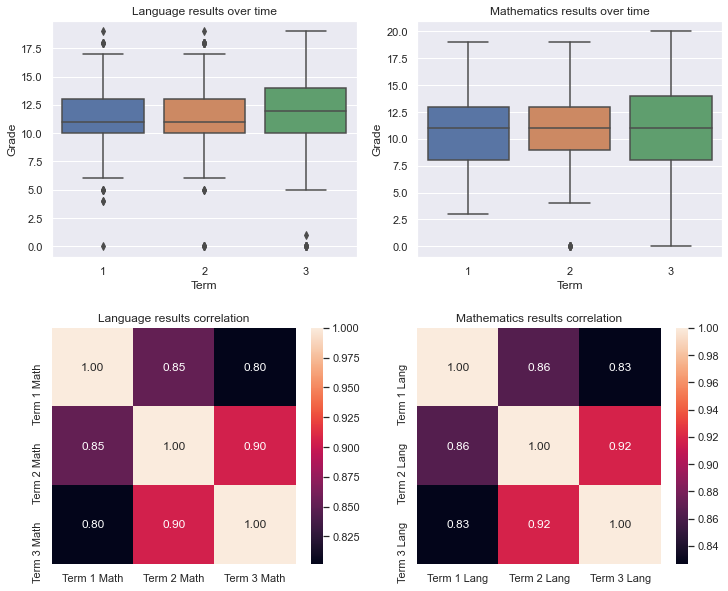

In [137]:
f, axes = plt.subplots(2,2, figsize = (12,10))
f.subplots_adjust(hspace=0.3)
axes[0,0].title.set_text('Language results over time')
axes[0,1].title.set_text('Mathematics results over time')
axes[1,0].title.set_text('Language results correlation')
axes[1,1].title.set_text('Mathematics results correlation')
sb.boxplot(data=language_results, y='Grade', x = 'Term',ax=axes[0,0])
sb.boxplot(data=math_results, y='Grade', x = 'Term', ax=axes[0,1])
sb.heatmap(student_results[math].corr(), annot = True, fmt = '0.2f', ax=axes[1,0])
sb.heatmap(student_results[lang].corr(), annot = True, fmt = '0.2f', ax=axes[1,1])

### Conclusion 
<a class="anchor" id="7.2"></a>

Language: Over time, students generally <b>improved</b> (as shown by the boxplots and mean). There was also increase in variance of the scores of students as the standard deviation increased

Mathematics: Over time, students were generally gradually <b>deproving</b> as the mean score of students fell. There was also increase in variance of scores and in term 3 there were even more than 1 student scoring 0 on the paper, as compared to the anomaly in term 2

###### [Return to Table of Contents](#0.7)

We will now attempt to identify areas of improvement and deduction and try to implement machine learning to help us address these problems

<a class="anchor" id="8.1"></a>
### Bonus: Can i predict Term 4 Grades using Students performance over time?

As we have seen earlier in our analysis report that students performance over time does have slight changes. We should try to use this trend to predict their final terms results. The model we will use is <b>Linear Regression</b>.

Why is this useful? Schools in some countries have 4 terms (eg. Singapore), identifying students who are expected to do poorly can be useful in deciding who to add to remedial classes. 

In [138]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression
from math import floor
linreg = LinearRegression()

#### We will first try to predict Math students grades

In [139]:
term4_math = []
for i in range(len(pf_math)):
    X = pd.DataFrame([1, 2, 3])
    y = []
    y.append(pf_math[['Term 1 Math','Term 2 Math','Term 3 Math']].iloc[i]['Term 1 Math'])
    y.append(pf_math[['Term 1 Math','Term 2 Math','Term 3 Math']].iloc[i]['Term 2 Math'])
    y.append(pf_math[['Term 1 Math','Term 2 Math','Term 3 Math']].iloc[i]['Term 3 Math'])
    y = pd.DataFrame(y)
    linreg.fit(X,y)
    # We will round down the grades as in reality a student scoring close to an A is still a B
    term4_math.append(floor(linreg.predict(pd.DataFrame([4]))[0][0]))

In [140]:
pf_math['Term 4 Math Predictions'] = pd.DataFrame(term4_math)
pf_math.head(3)

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,PastFails,SchoolSup,FamilySup,PaidSup,Activities,Internet,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,Term 1 Math,Term 2 Math,Term 3 Math,Term 4 Math Predictions
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,0,Yes,No,No,No,No,No,4,3,4,3,6,5,6,6,6
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,0,No,Yes,No,No,Yes,No,5,3,3,3,4,5,5,6,6
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,3,Yes,No,Yes,No,Yes,No,4,3,2,3,10,7,8,10,11


#### Time to do some for Language students as well

In [141]:
term4_lang = []
for i in range(len(pf_lang)):
    X = pd.DataFrame([1, 2, 3])
    y = []
    y.append(pf_lang[['T1']].iloc[i]['T1'])
    y.append(pf_lang[['T2']].iloc[i]['T2'])
    y.append(pf_lang[['T3']].iloc[i]['T3'])
    y = pd.DataFrame(y)
    linreg.fit(X,y)
    # We will round down the grades as in reality a student scoring close to an A is still a B
    term4_lang.append(floor(linreg.predict(pd.DataFrame([4]))[0][0]))

In [142]:
pf_lang['Term 4 Lang Predictions'] = pd.DataFrame(term4_lang)
pf_lang.head()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,PastFails,SchoolSup,FamilySup,PaidSup,Activities,Internet,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,T1,T2,T3,Term 4 Lang Predictions
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,0,Yes,No,No,No,No,No,4,3,4,3,4,0,11,11,18
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,0,No,Yes,No,No,Yes,No,5,3,3,3,2,9,11,11,12
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,0,Yes,No,No,No,Yes,No,4,3,2,3,6,12,13,12,12
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,0,No,Yes,No,Yes,Yes,Yes,3,2,2,5,0,14,14,14,14
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,0,No,Yes,No,No,No,No,4,3,2,5,0,11,13,13,14


##### Cons: 
One downside to this solution would be that we do not take into account students who have performed poorly/might have missed one exam and got a zero. The LinearRegression model line would try to minimise the error and as a result over/under predict the score

<a class="anchor" id="8.2"></a>
### Bonus: Can i identify whether a student should be given extra school support? 

Some students are given educational support from the school. Can we try to classify students based on a set of given inputs? 

Why is this useful? This can be used by the school to decide whether a student needs more support

In [143]:
df.head()

,School,Gender,Age,Residence,Mother Education,Father Education,Mother Job,Father Job,TravelTime,StudyTime,Class Fails,School Support,Family Support,Tution,CCA,Internet,Romantic,Family Relationship,FreeTime,GoingOut,Health,School Absenty,Term 1 Lang,Term 2 Lang,Term 3 Lang,Term 1 Math,Term 2 Math,Term 3 Math,Term Lang Avg,Term Math Avg
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,0,Yes,No,No,No,No,No,4,3,4,3,4,0.0,11.0,11.0,NaN,NaN,NaN,7.333333,NaN
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,0,No,Yes,No,No,Yes,No,5,3,3,3,2,9.0,11.0,11.0,NaN,NaN,NaN,10.333333,NaN
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,0,Yes,No,No,No,Yes,No,4,3,2,3,6,12.0,13.0,12.0,NaN,NaN,NaN,12.333333,NaN
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,0,No,Yes,No,Yes,Yes,Yes,3,2,2,5,0,14.0,14.0,14.0,NaN,NaN,NaN,14.000000,NaN
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,0,No,Yes,No,No,No,No,4,3,2,5,0,11.0,13.0,13.0,NaN,NaN,NaN,12.333333,NaN


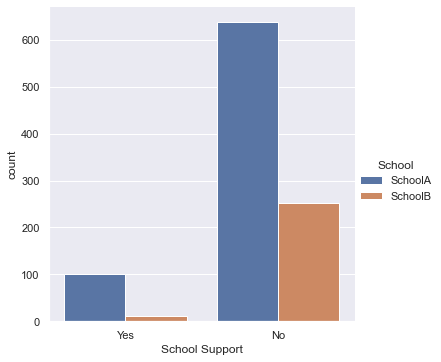

In [144]:
# Look at School Support
sb.catplot(data=df, kind='count',x='School Support', hue="School")

In [145]:
# Importing Classification model Decision Tree, Train Test Split and other relevat functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


dectree = DecisionTreeClassifier(max_depth= 5)
labelenc = LabelEncoder()
sm = SMOTE()


As there is a significant difference in the school support ratio, we will try to balance this using <b>Synthetic Minority Oversampling Technique (SMOTE)</b>. The features chosen below were after i tried different combinations to get the best results

In [146]:
y = df.loc[df['Term Math Avg'].notnull()][['School Support']]
X = df.loc[df['Term Math Avg'].notnull()][['Age','Term 1 Math','Term 2 Math','Term 3 Math','Romantic','CCA','Internet']]
X['Romantic'] = labelenc.fit_transform(X[['Romantic']])
X['CCA'] = labelenc.fit_transform(X[['CCA']])
X['Internet'] = labelenc.fit_transform(X[['Internet']])
print("Shape of X before SMOTE", X.shape)
X, y = sm.fit_resample(X, y)
print("Shape of X after SMOTE",X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25,random_state=5)
print("Train Dataset size is:", len(X_train))
print("Validation Dataset size is:",len(X_test))

Shape of X before SMOTE (395, 7)
Shape of X after SMOTE (688, 7)
Train Dataset size is: 516
Validation Dataset size is: 172


### Run the code below to view the DecisionTree image.
I am using graphviz as the image generated at `max_depth=5` is clearer

In [147]:
# Fitting the model 
dectree.fit(X_train,y_train)
y_pred = dectree.predict(X_test)

In [148]:
# Outputting the Decision tree as a Dot format and then reading it
from sklearn import tree
from graphviz import Source

tree_file = tree.export_graphviz(
            dectree,
            out_file =  "myTreeName.dot",
            feature_names = list(X.columns),
            filled = True,
            rounded = True)

s = Source.from_file("myTreename.dot")
s.view()

'myTreename.dot.pdf'

The accuracy of our model is: 0.87


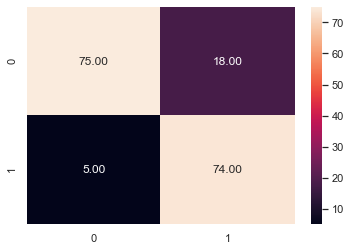

In [149]:
sb.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt='0.2f')
print("The accuracy of our model is: {:.2f}".format((confusion_matrix(y_test, y_pred)[0][0] + confusion_matrix(y_test, y_pred)[1][1])/(sum(confusion_matrix(y_test, y_pred)[0]) + sum(confusion_matrix(y_test, y_pred)[1]))))

Our model is generally quite accurate in classifying whether a student has school support or not. 

This model can be applied to identify whether future students require more educational support from the school.

###### [Return to Table of Contents](#0.0)

### Overall Conclusion

We have come to the end of the Exploratory Analysis. In this EDA we have analysed each individuals features and their impact on grades and relations with other features. For some of the features such as parents jobs ('others'), we have concluded that the information we have is insufficient to make a proper deduction. 

I hope this EDA was enjoyable to read as it was challenging for me to do :) Thank You!